In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Data Loading and Initial Exploration

In [2]:
uploaded = files.upload()

# Upload the CSV
df = pd.read_csv(list(uploaded.keys())[0])

# Check dimensions and first rows
print("Shape of the dataset:", df.shape)
df.head()

Saving MIMIC_data_sample_mortality.csv to MIMIC_data_sample_mortality.csv
Shape of the dataset: (4559, 72)


icustay_id  hadm_id  subject_id  thirtyday_expire_flag  icu_los      age  \
0      205941   156324       88883                      1   1.9945  80.5274   
1      252848   163315       46154                      1   0.4003  91.4000   
2      237901   180937       42682                      0   8.7838  80.9409   
3      207491   143962       45111                      1   3.1559  84.8807   
4      293063   118489       56648                      1   0.5614  73.8195   

  gender  is_male              ethnicity  race_white  ...  meanbp_mean  \
0      M        1                  WHITE           1  ...    66.000000   
1      M        1  UNKNOWN/NOT SPECIFIED           0  ...    51.888889   
2      F        0                  WHITE           1  ...    66.512821   
3      M        1                  WHITE           1  ...    60.833333   
4      F        0                  WHITE           1  ...    76.894737   

   resprate_min  resprate_max  resprate_mean  tempc_min  tempc_max  \
0          20.0          28.0      24.419355        NaN        NaN   
1          16.0          34.0      26.500000  37.388889  37.444444   
2          16.0          23.0      19.571429  33.833333  36.888889   
3          20.0          31.0      24.520000  36.222222  36.666667   
4          20.0          46.0      32.117647  35.833333  36.944444   

   tempc_mean  spo2_min  spo2_max  spo2_mean  
0         NaN      93.0      97.0  95.275862  
1   37.416667       NaN       NaN        NaN  
2   35.879630      87.0     100.0  98.100000  
3   36.472222      90.0     100.0  97.600000  
4   36.222222      86.0     100.0  96.250000  

[5 rows x 72 columns]

🔍 Basic Exploration

In [3]:
# Summary of data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559 entries, 0 to 4558
Data columns (total 72 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   icustay_id             4559 non-null   int64  
 1   hadm_id                4559 non-null   int64  
 2   subject_id             4559 non-null   int64  
 3   thirtyday_expire_flag  4559 non-null   int64  
 4   icu_los                4559 non-null   float64
 5   age                    4559 non-null   float64
 6   gender                 4559 non-null   object 
 7   is_male                4559 non-null   int64  
 8   ethnicity              4559 non-null   object 
 9   race_white             4559 non-null   int64  
 10  race_black             4559 non-null   int64  
 11  race_hispanic          4559 non-null   int64  
 12  race_other             4559 non-null   int64  
 13  metastatic_cancer      4559 non-null   int64  
 14  diabetes               4559 non-null   int64  
 15  firs

In [4]:
# Statistical summary for numeric variables
df.describe()

icustay_id        hadm_id    subject_id  thirtyday_expire_flag  \
count    4559.000000    4559.000000   4559.000000            4559.000000   
mean   250659.192367  149895.166265  68163.638737               0.194999   
std     28770.209912   28713.760695  18480.543170               0.396243   
min    200075.000000  100003.000000    165.000000               0.000000   
25%    225575.500000  125389.000000  53111.500000               0.000000   
50%    251008.000000  149643.000000  68368.000000               0.000000   
75%    275526.000000  175033.000000  83771.500000               0.000000   
max    299998.000000  199962.000000  99982.000000               1.000000   

           icu_los          age      is_male   race_white   race_black  \
count  4559.000000  4559.000000  4559.000000  4559.000000  4559.000000   
mean      5.026204    65.131600     0.566133     0.718579     0.086203   
std       6.336042    17.671337     0.495662     0.449742     0.280695   
min       0.166500    16.783400     0.000000     0.000000     0.000000   
25%       1.605950    53.764350     0.000000     0.000000     0.000000   
50%       2.823000    66.588700     1.000000     1.000000     0.000000   
75%       5.865300    79.525350     1.000000     1.000000     0.000000   
max     101.739000    91.400000     1.000000     1.000000     1.000000   

       race_hispanic  ...  meanbp_mean  resprate_min  resprate_max  \
count    4559.000000  ...  4559.000000   4558.000000   4558.000000   
mean        0.033121  ...    76.168044     12.816147     28.197674   
std         0.178973  ...    10.503878      3.876238      6.456602   
min         0.000000  ...    45.600000      1.000000     13.000000   
25%         0.000000  ...    69.041667     10.000000     24.000000   
50%         0.000000  ...    75.000000     13.000000     27.000000   
75%         0.000000  ...    82.412879     15.000000     32.000000   
max         1.000000  ...   133.156250     32.000000     69.000000   

       resprate_mean    tempc_min    tempc_max   tempc_mean     spo2_min  \
count    4558.000000  4456.000000  4456.000000  4456.000000  4558.000000   
mean       19.919672    36.075322    37.577050    36.845784    91.082273   
std         4.277664     0.925948     0.918042     0.741059     7.812963   
min         9.538462    15.000000    31.600000    31.600000     1.000000   
25%        16.785714    35.611111    37.000000    36.411111    90.000000   
50%        19.259985    36.111111    37.500000    36.824736    93.000000   
75%        22.404054    36.611111    38.111111    37.305556    95.000000   
max        40.583333    39.600000    42.000000    40.103922   100.000000   

          spo2_max    spo2_mean  
count  4558.000000  4558.000000  
mean     99.570645    96.910880  
std       0.969895     2.480538  
min      89.000000    55.869565  
25%     100.000000    95.800000  
50%     100.000000    97.258662  
75%     100.000000    98.600000  
max     100.000000   100.000000  

[8 rows x 69 columns]

In [5]:
# Count missing values per column
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

inr_min            270
inr_max            270
tempc_min          103
tempc_mean         103
tempc_max          103
glucose_mean        30
glucose_max1        30
glucose_min1        30
sysbp_mean           8
sysbp_max            8
sysbp_min            8
diasbp_min           8
diasbp_mean          8
diasbp_max           8
platelet_min         6
platelet_max         6
wbc_max              5
wbc_min              5
bicarbonate_max      3
bicarbonate_min      3
hemoglobin_max       3
hemoglobin_min       3
hematocrit_max       3
hematocrit_min       3
creatinine_max       2
creatinine_min       2
bun_min              2
bun_max              2
chloride_min         1
chloride_max         1
resprate_min         1
resprate_mean        1
resprate_max         1
spo2_min             1
spo2_max             1
spo2_mean            1
dtype: int64

Data Cleaning & Preparation

In [6]:
# Calculate percentage of nulls
missing_pct = df.isnull().mean() * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

# Show those with missing values
missing_pct

inr_min            5.922351
inr_max            5.922351
tempc_min          2.259267
tempc_mean         2.259267
tempc_max          2.259267
glucose_mean       0.658039
glucose_max1       0.658039
glucose_min1       0.658039
sysbp_mean         0.175477
sysbp_max          0.175477
sysbp_min          0.175477
diasbp_min         0.175477
diasbp_mean        0.175477
diasbp_max         0.175477
platelet_min       0.131608
platelet_max       0.131608
wbc_max            0.109673
wbc_min            0.109673
bicarbonate_max    0.065804
bicarbonate_min    0.065804
hemoglobin_max     0.065804
hemoglobin_min     0.065804
hematocrit_max     0.065804
hematocrit_min     0.065804
creatinine_max     0.043869
creatinine_min     0.043869
bun_min            0.043869
bun_max            0.043869
chloride_min       0.021935
chloride_max       0.021935
resprate_min       0.021935
resprate_mean      0.021935
resprate_max       0.021935
spo2_min           0.021935
spo2_max           0.021935
spo2_mean          0.021935
dtype: float64

### Exclusion Criteria
Patients will be excluded from the analysis if they meet any of the following criteria, based on approaches used in previous studies:
1.	Age below 18 years,
2.	Missing 10 or more clinical variables,



In [7]:
# Keep only patients aged 18 and older
df = df[df['age'] >= 18].copy()
print(f"Remaining patients after filtering out under 18: {df.shape[0]}")

Remaining patients after filtering out under 18: 4555


In [8]:
# Remove rows (patients) with 10 or more missing values
df = df[df.isnull().sum(axis=1) < 10].copy()
print(f"Remaining patients after removing rows with 10+ missing values: {df.shape[0]}")

Remaining patients after removing rows with 10+ missing values: 4552


### Missing Data Imputation using MICE
Missing values in numeric features were imputed using Multiple Imputation by Chained Equations (MICE).
This iterative method predicts each missing value based on all other available features, preserving multivariate relationships and reducing bias.

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select all numeric columns for imputation
numeric_cols = df.select_dtypes(include='number').columns

# Initialize the MICE imputer
imputer = IterativeImputer(random_state=0)

# Apply MICE imputation directly on the original DataFrame
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Print to verify that missing values were filled
print("Remaining missing values after MICE imputation:")
print(df[numeric_cols].isnull().sum())

Remaining missing values after MICE imputation:
icustay_id               0
hadm_id                  0
subject_id               0
thirtyday_expire_flag    0
icu_los                  0
                        ..
tempc_max                0
tempc_mean               0
spo2_min                 0
spo2_max                 0
spo2_mean                0
Length: 69, dtype: int64


In [10]:
# Count missing values per column
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Series([], dtype: int64)

###	Outlier Handling
All continuous variables were winsorized at the 2nd and 98th percentiles to limit the impact of outliers. Missing values were imputed using the median within each age and sex group, and remaining missing values were filled with the overall median.

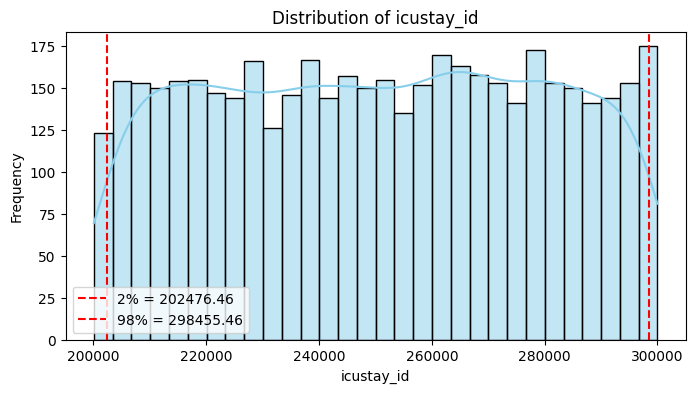

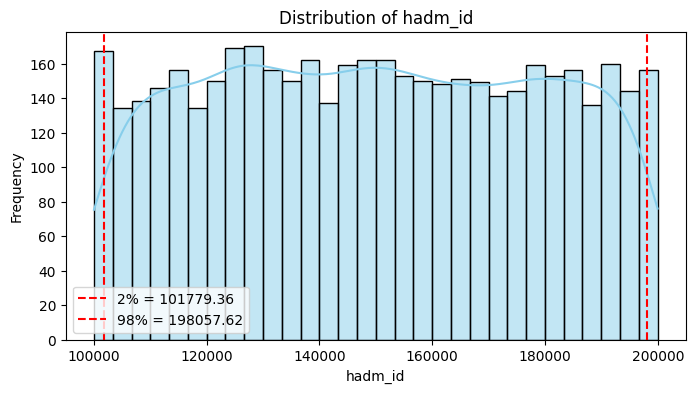

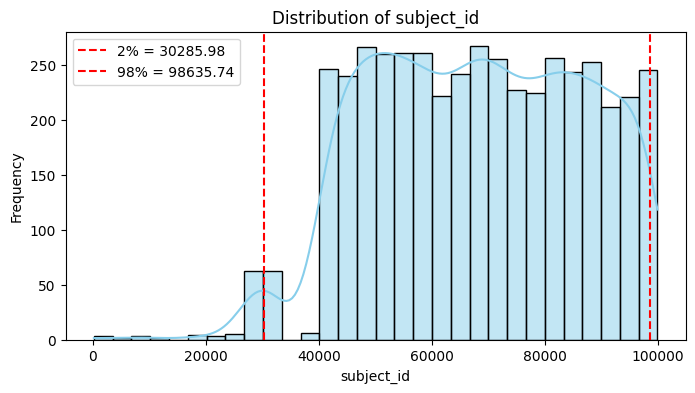

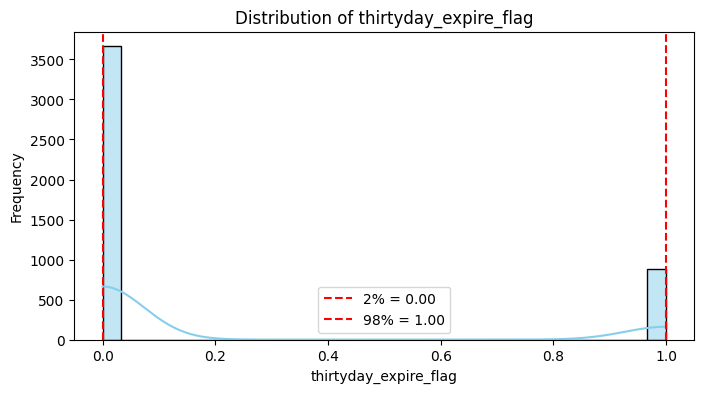

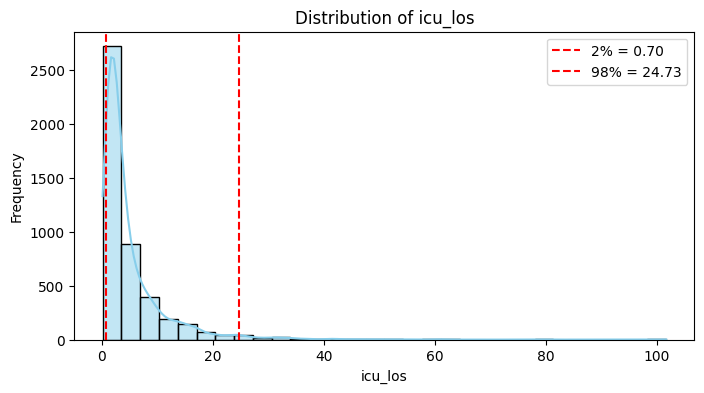

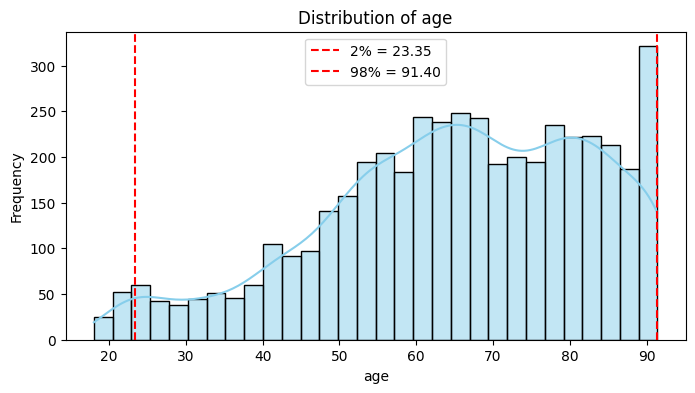

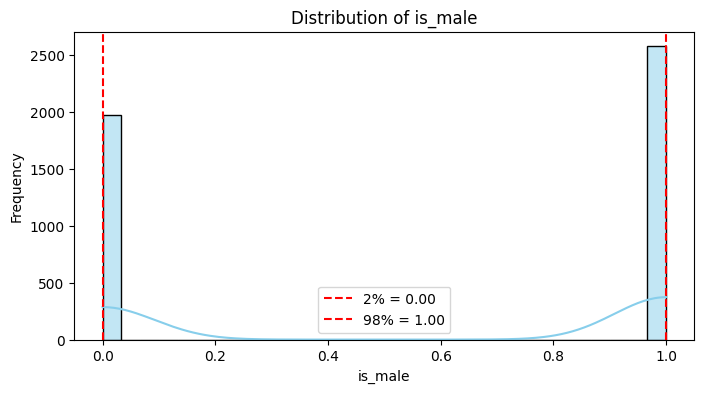

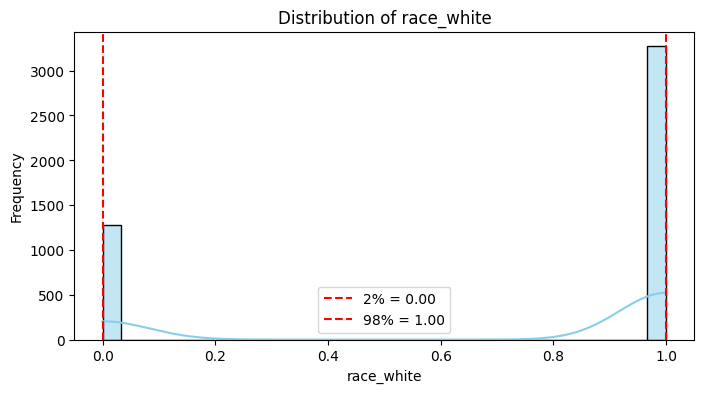

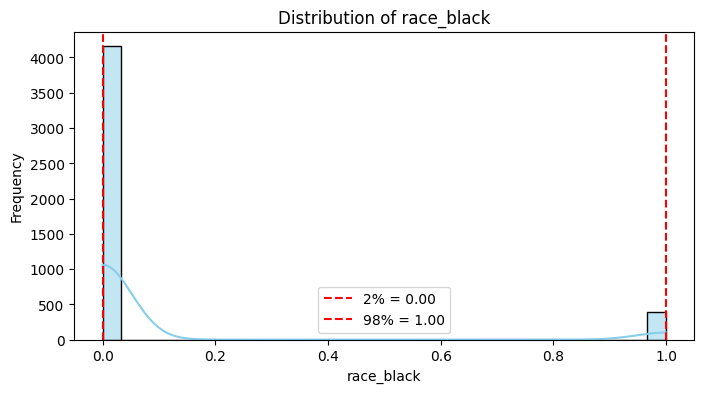

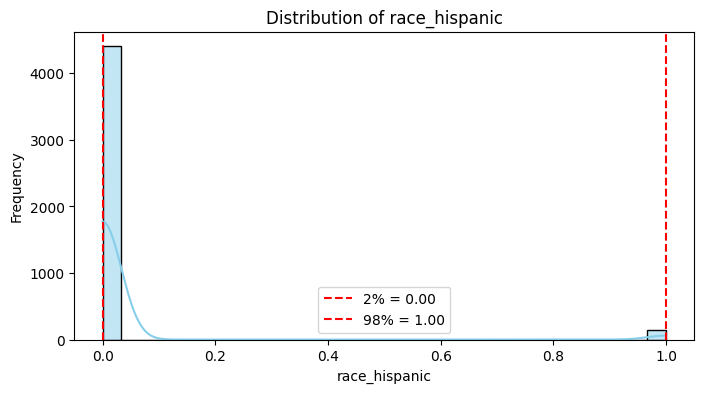

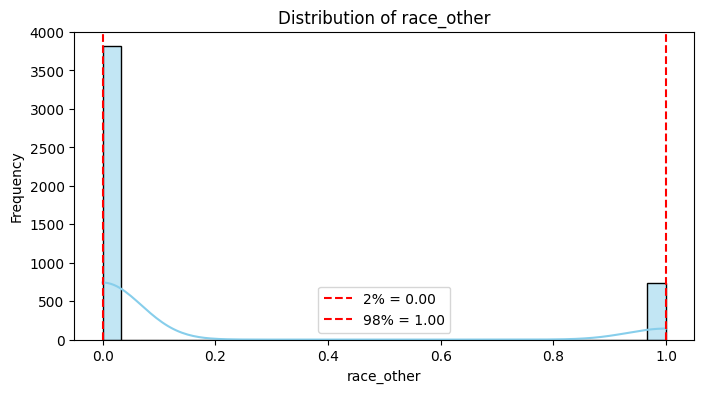

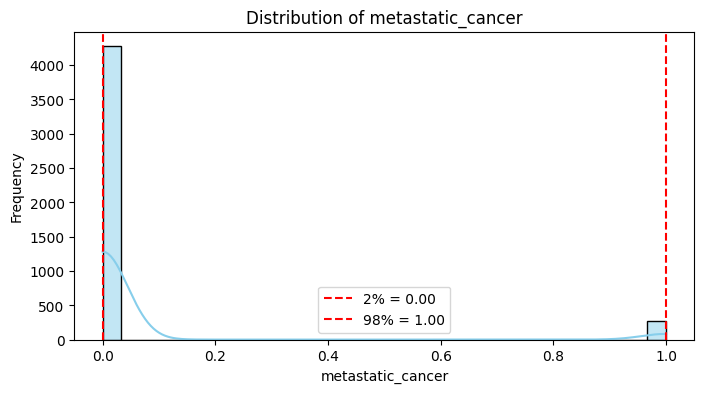

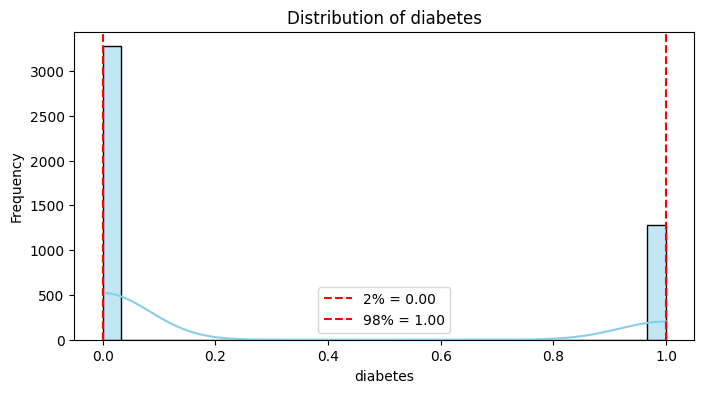

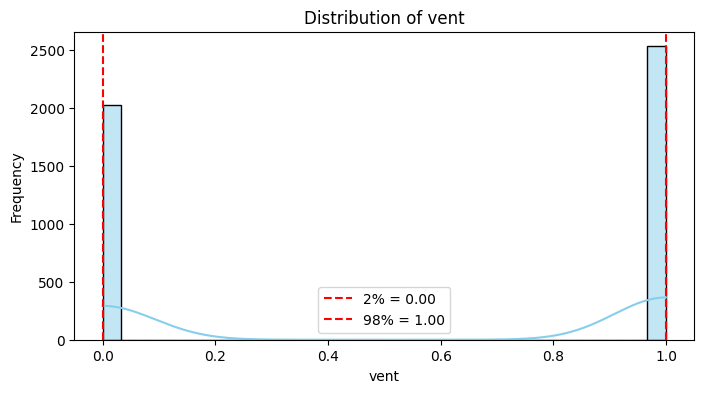

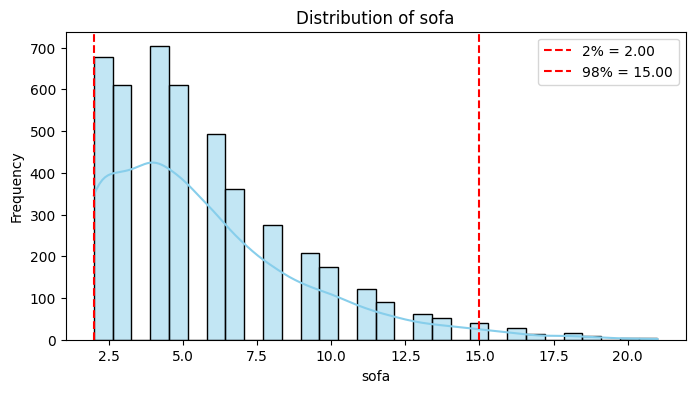

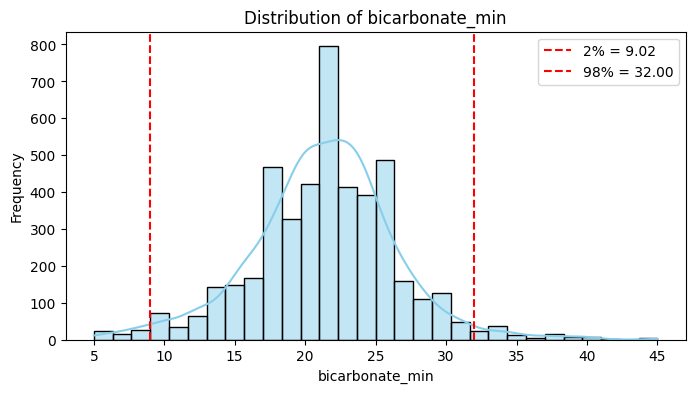

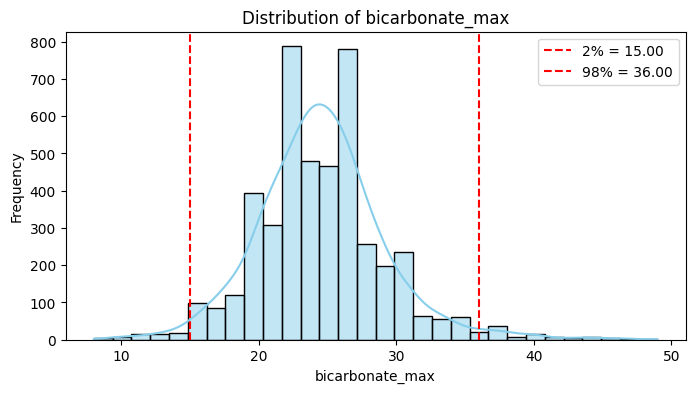

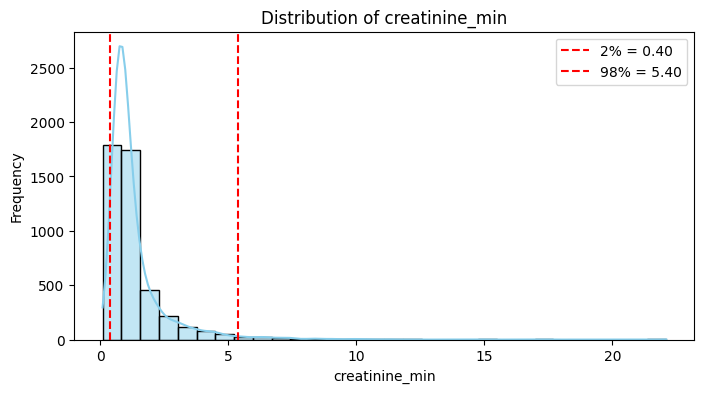

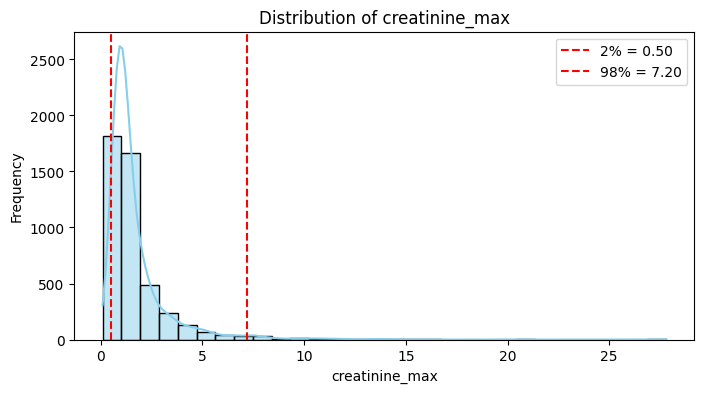

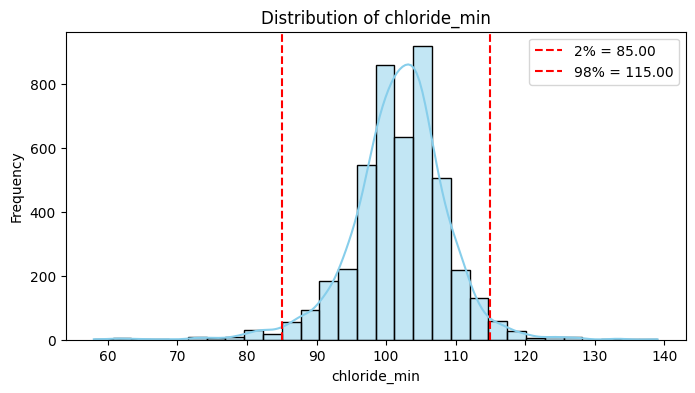

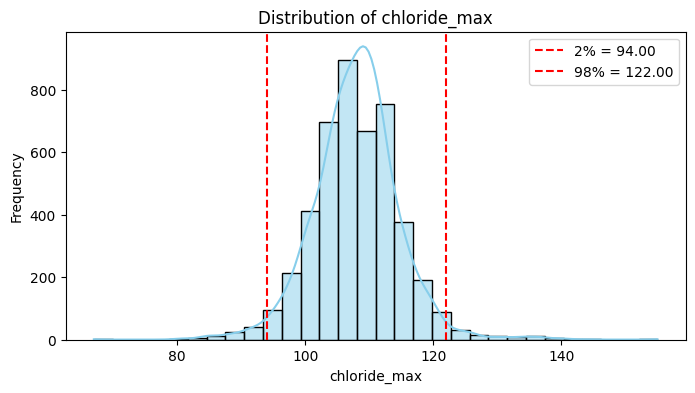

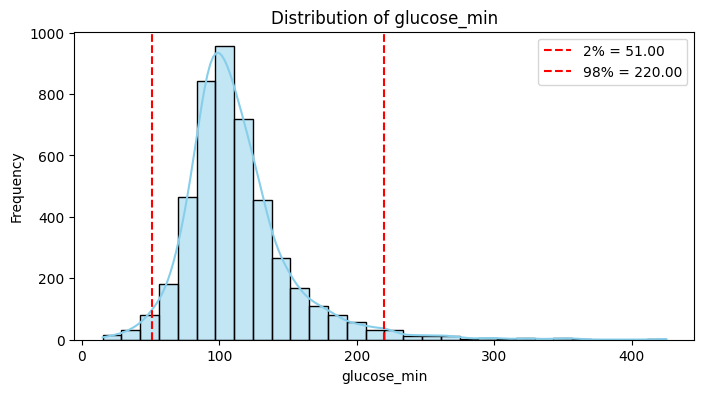

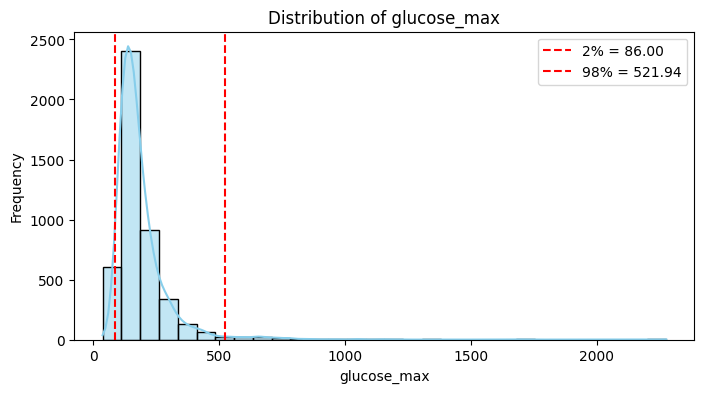

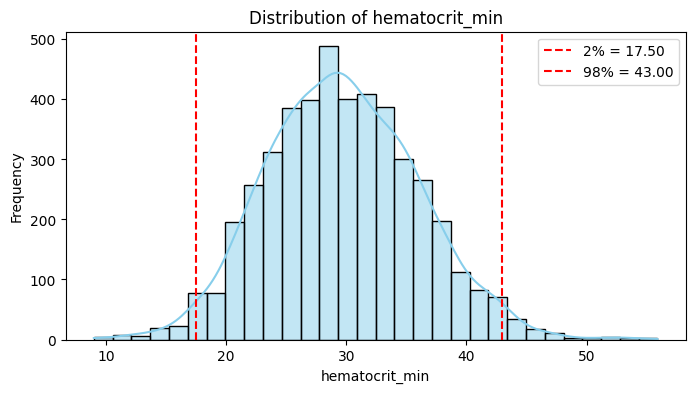

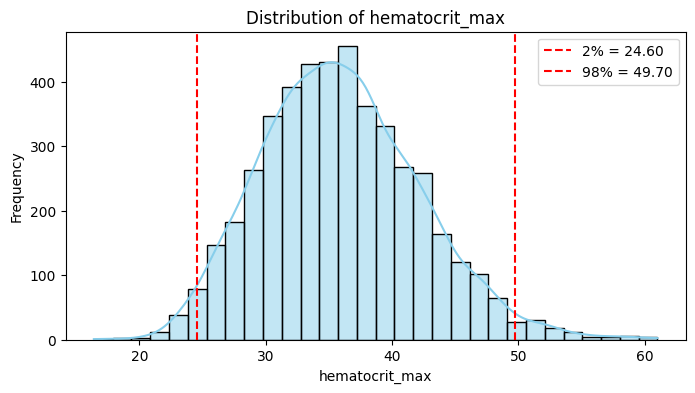

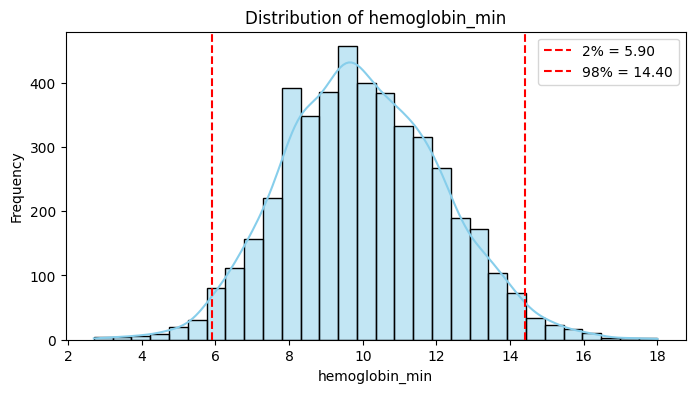

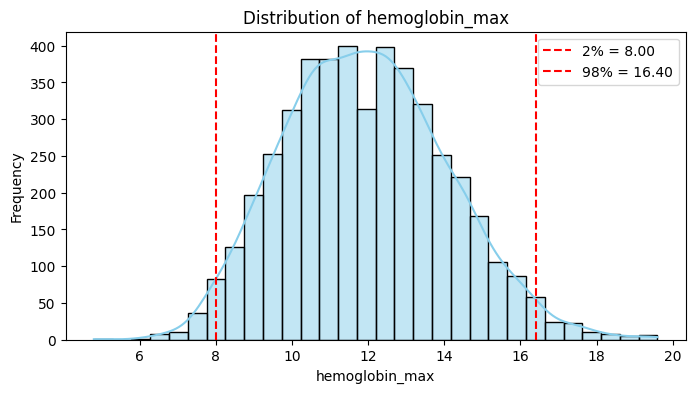

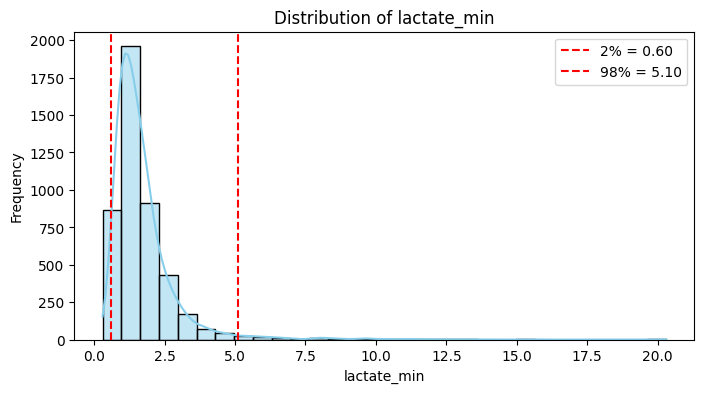

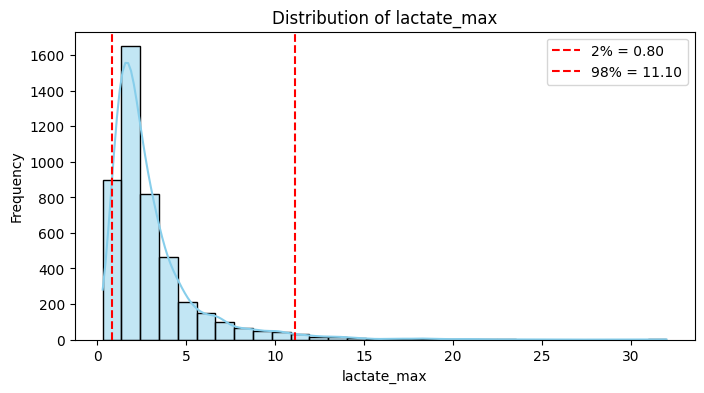

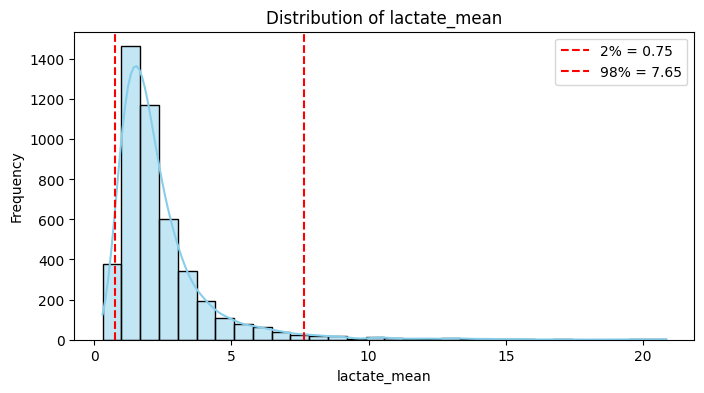

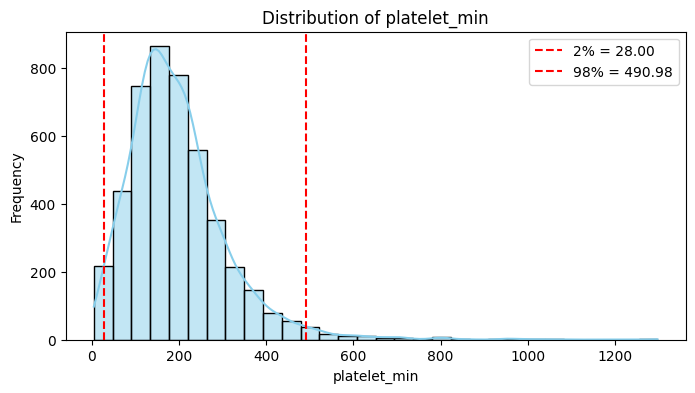

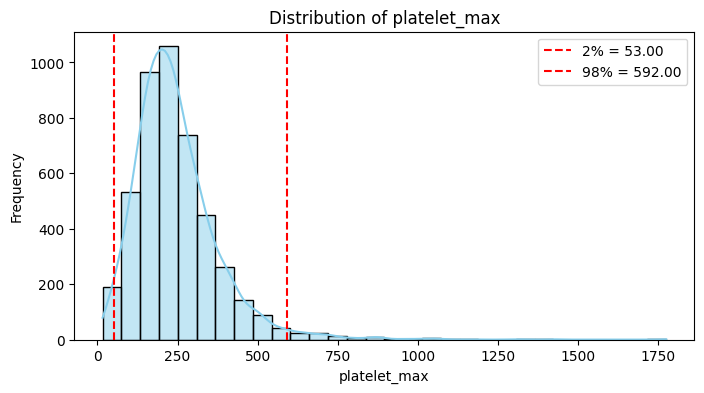

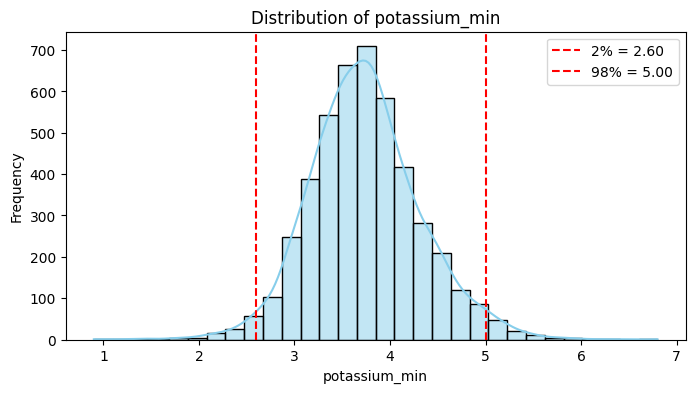

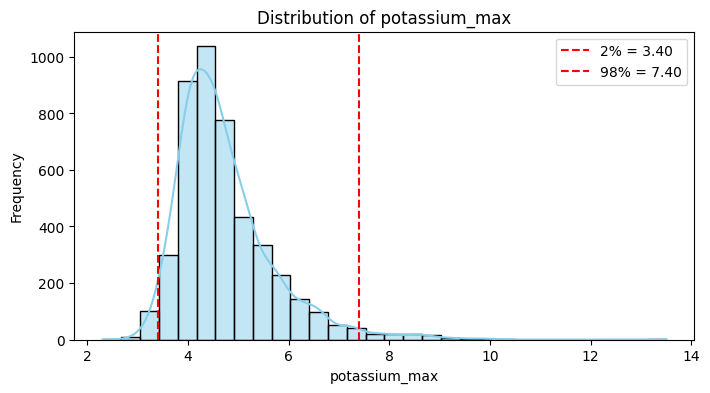

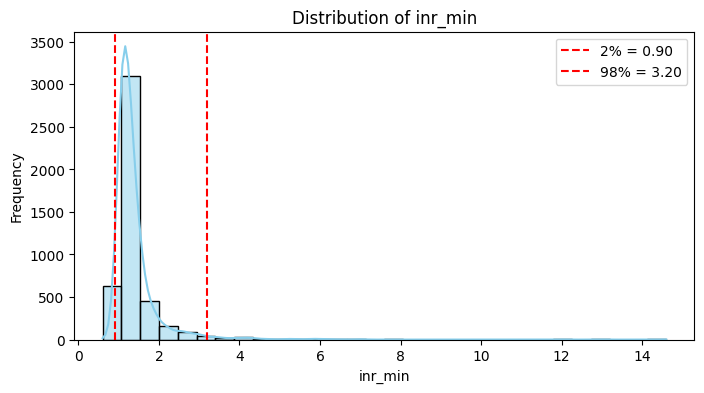

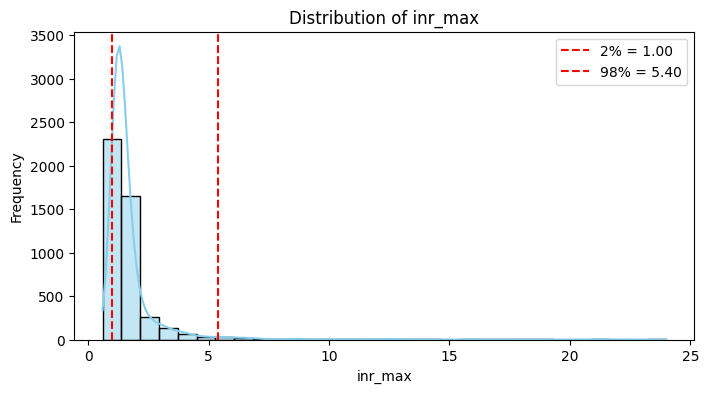

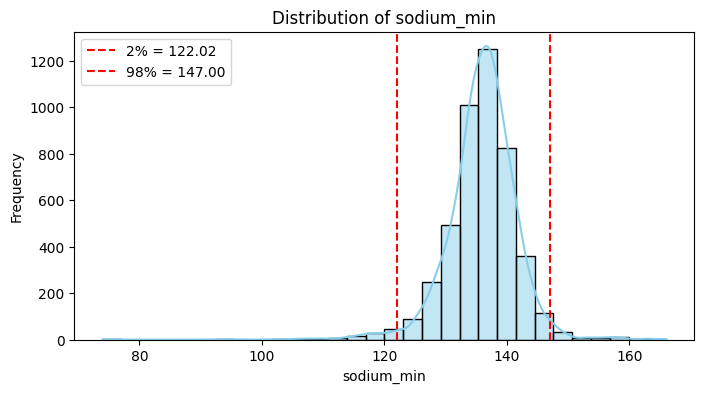

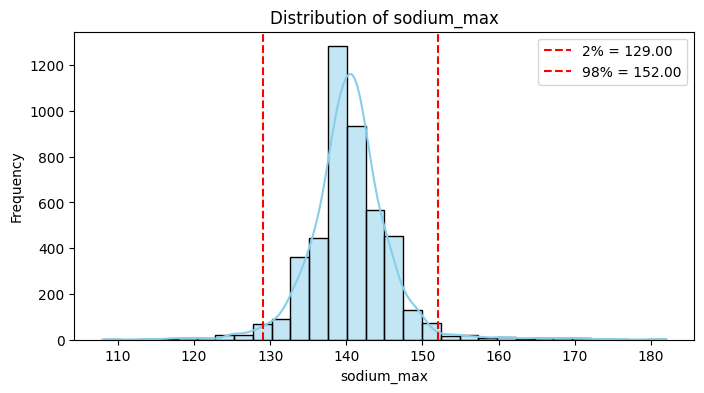

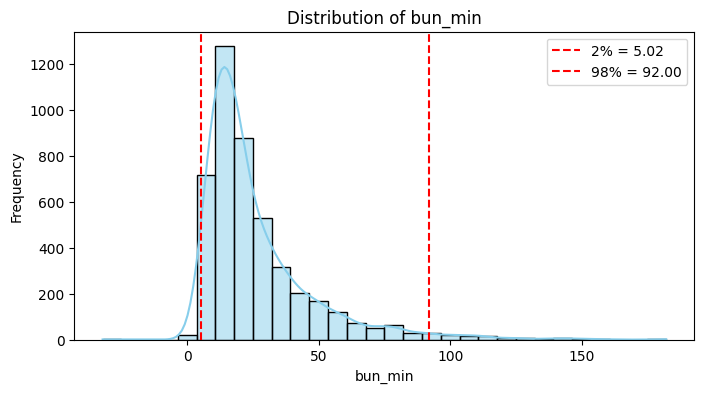

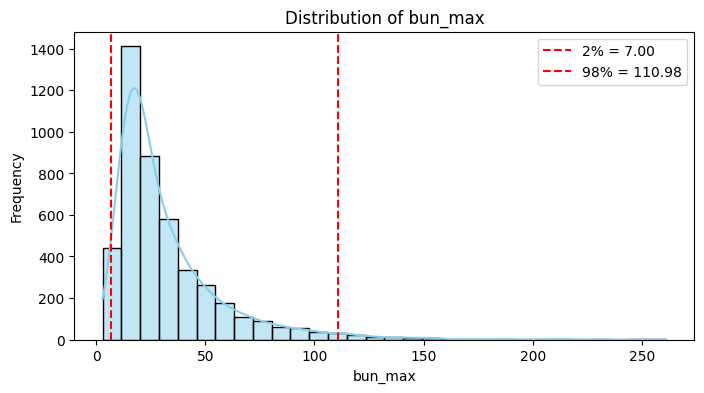

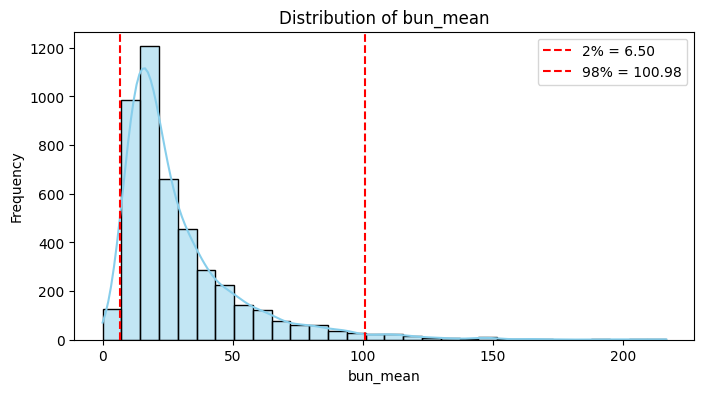

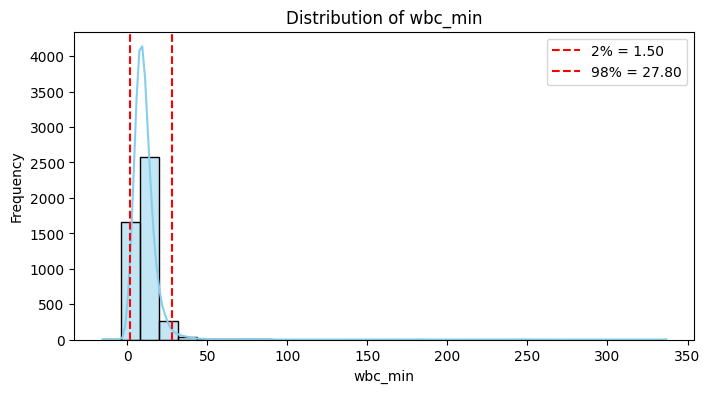

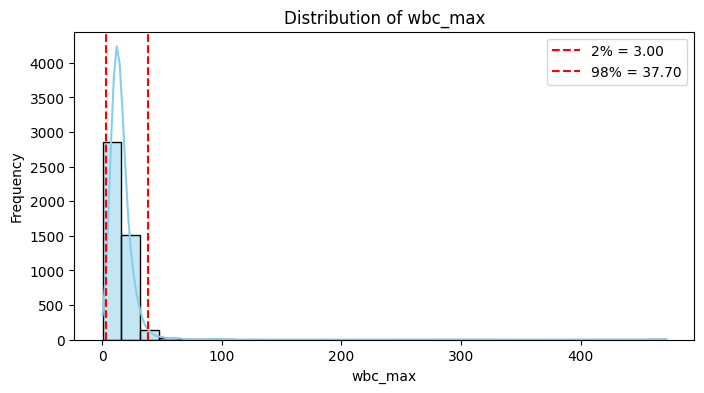

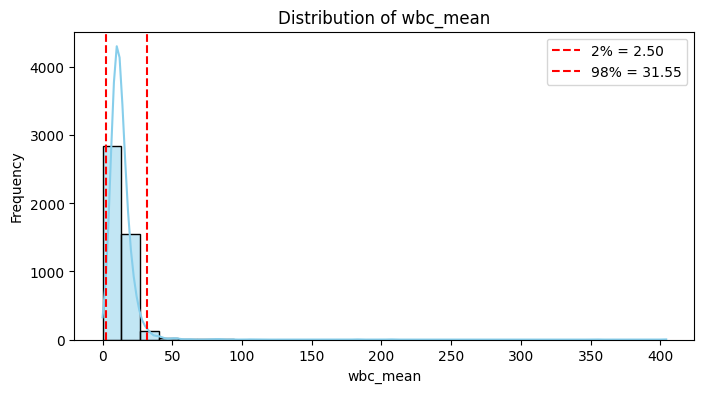

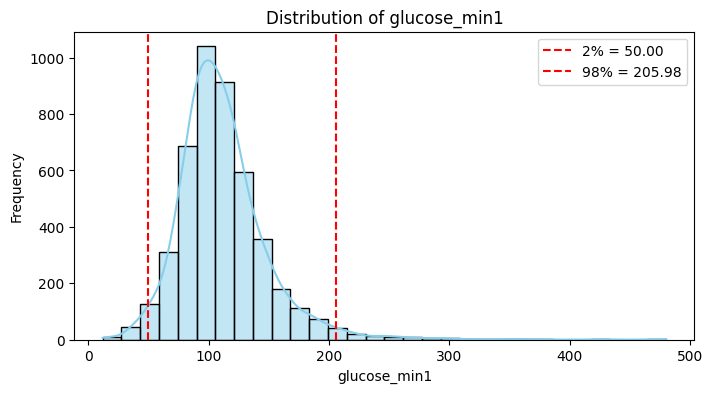

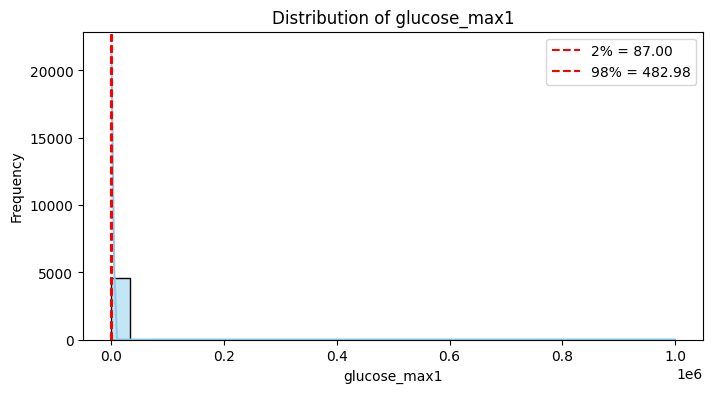

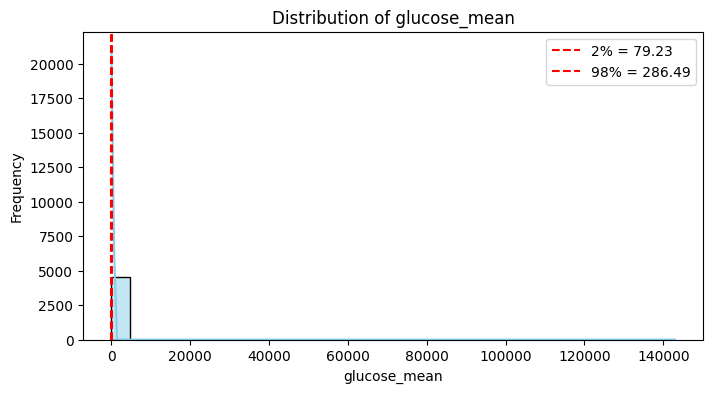

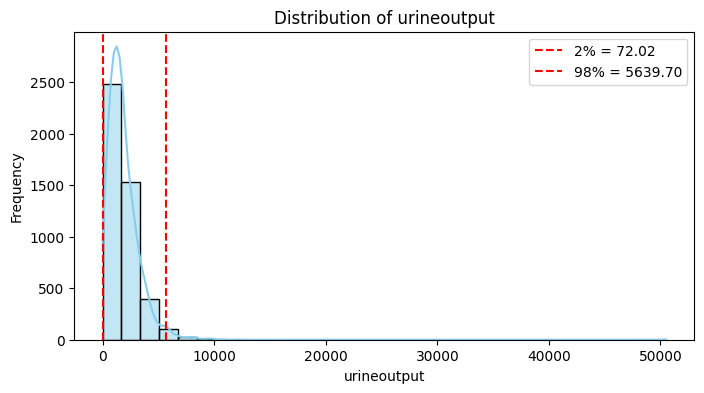

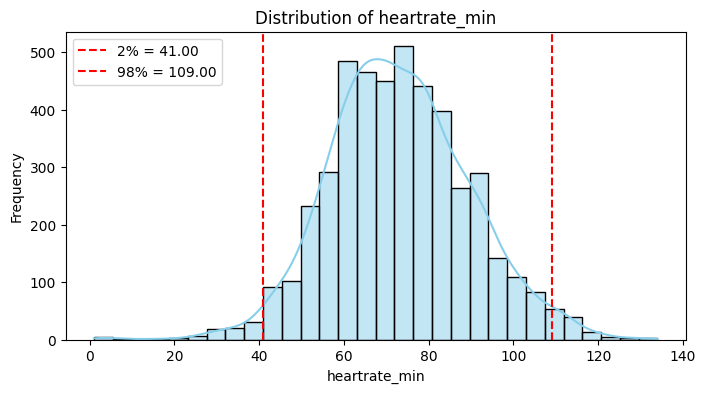

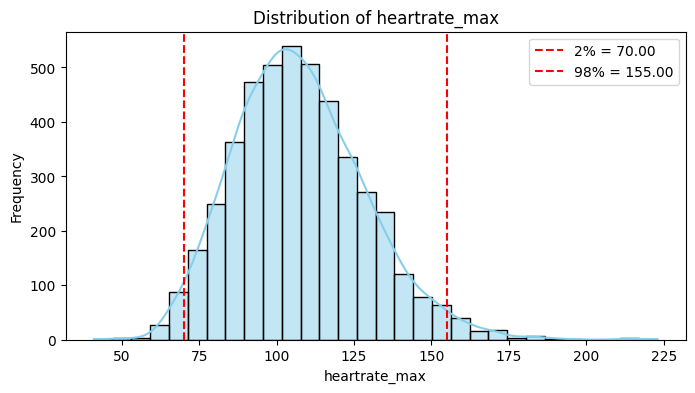

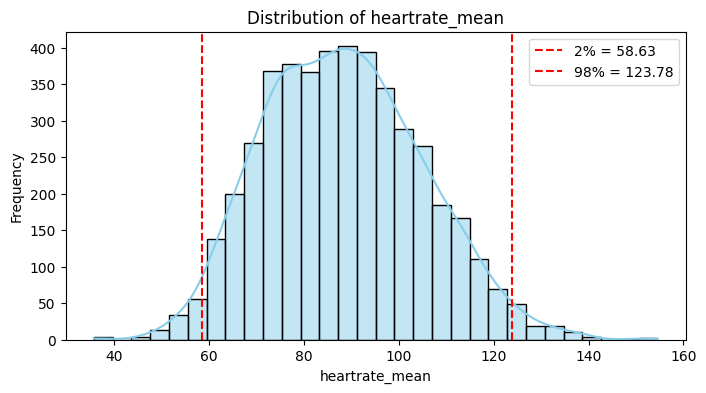

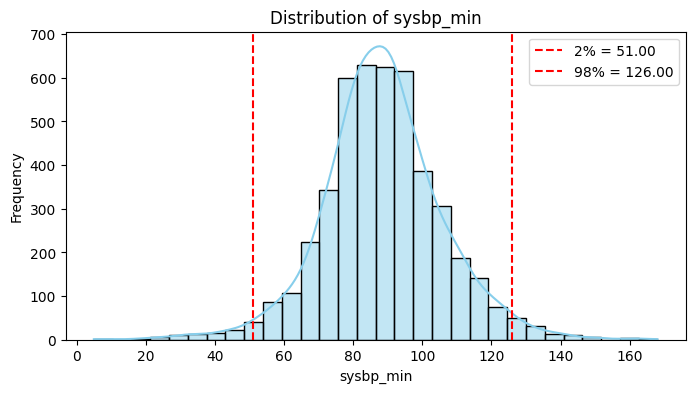

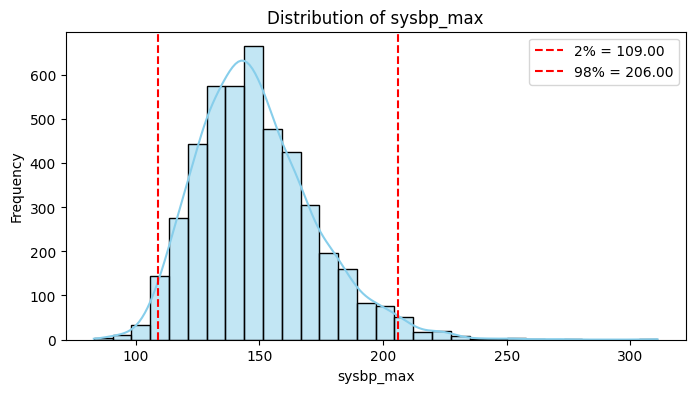

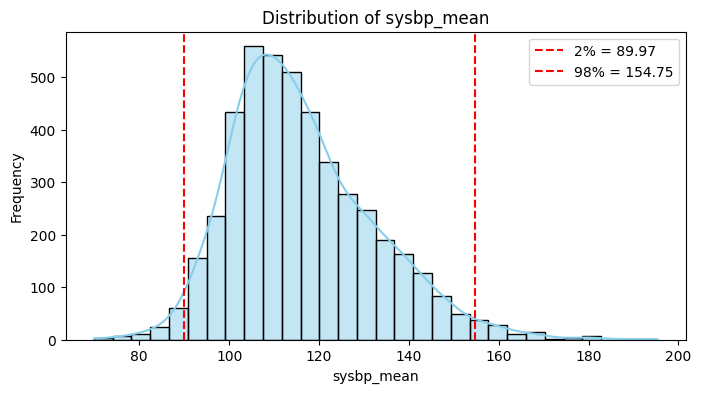

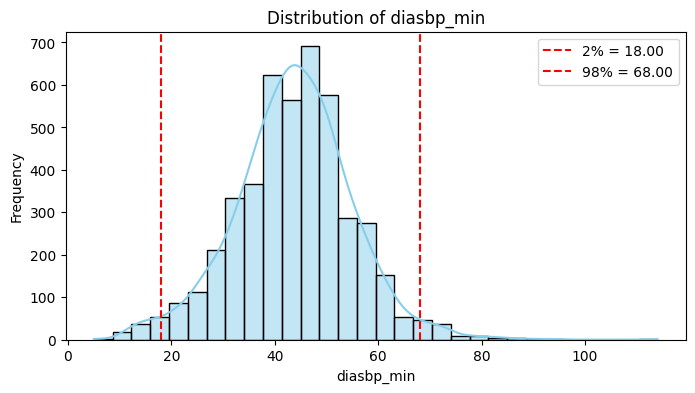

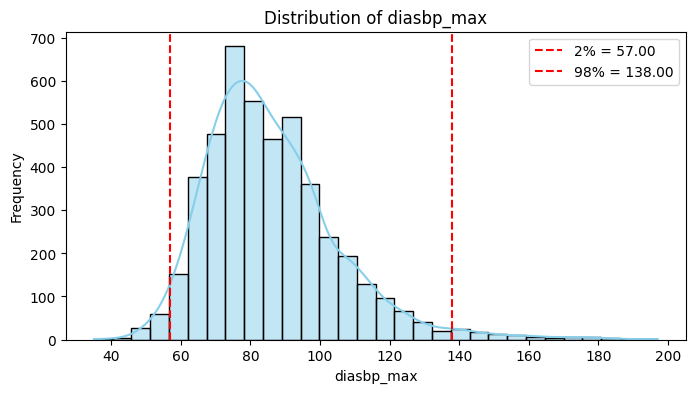

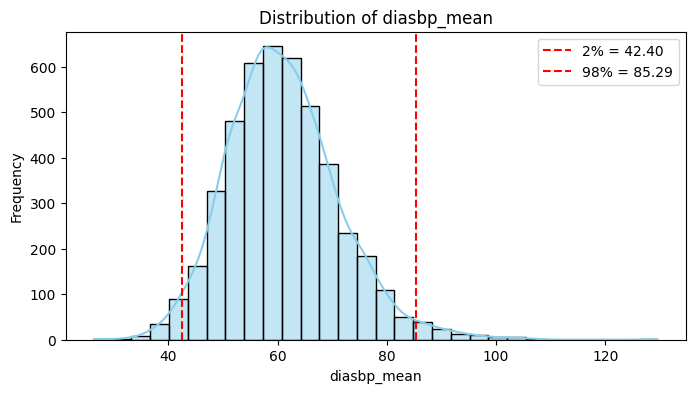

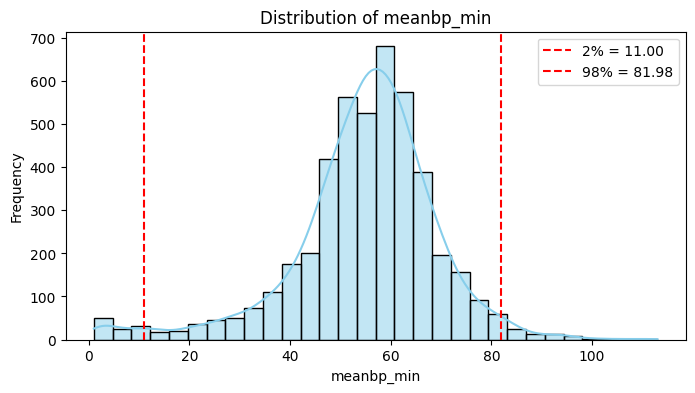

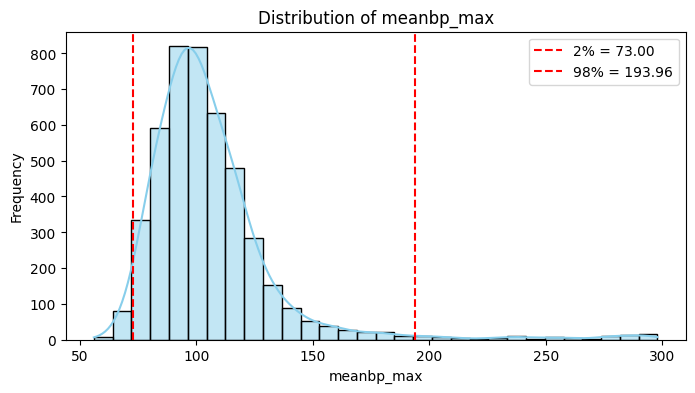

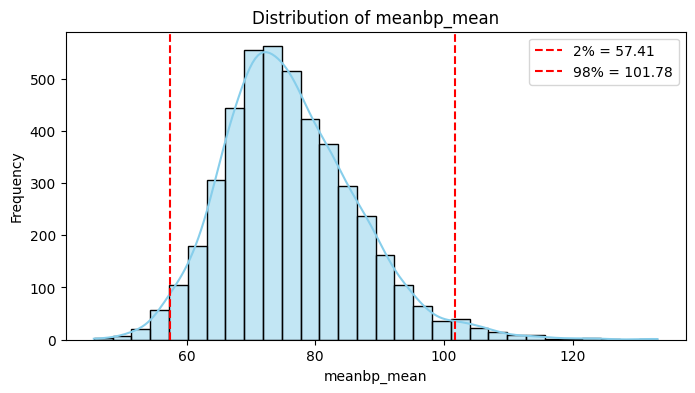

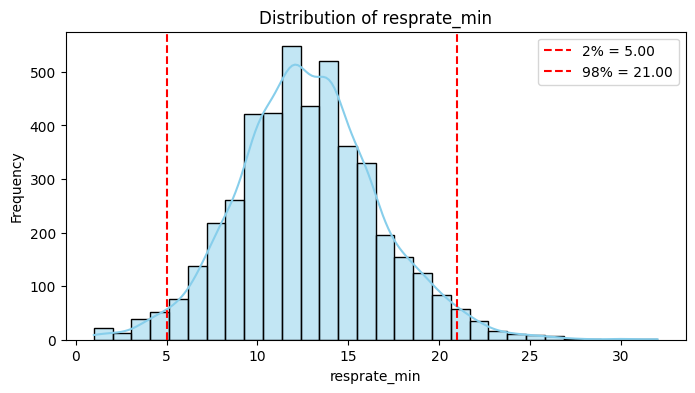

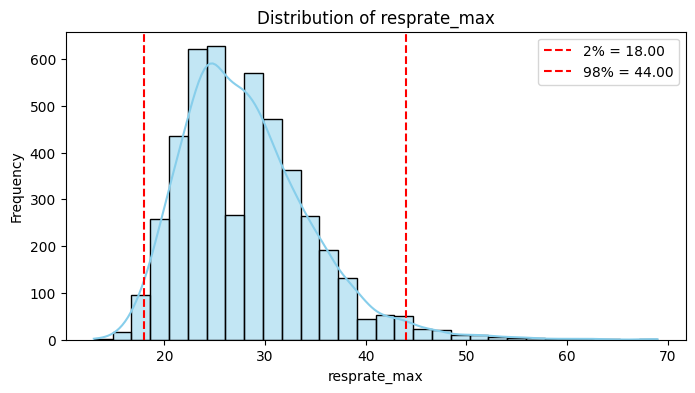

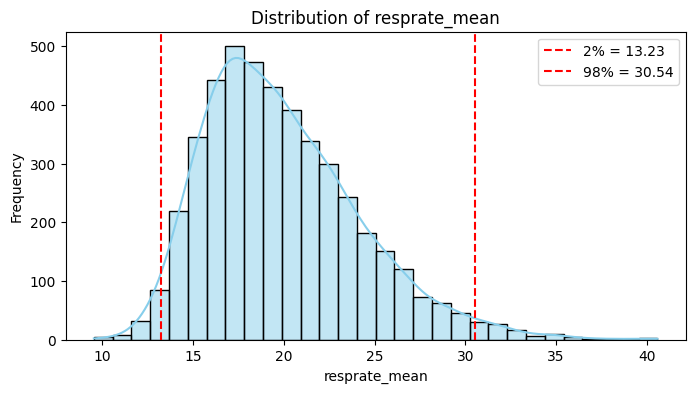

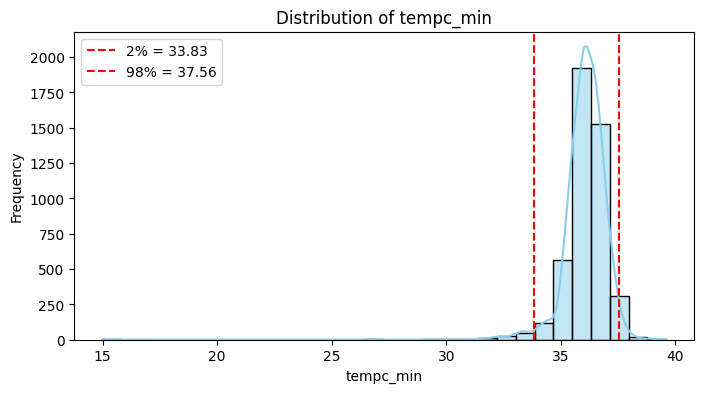

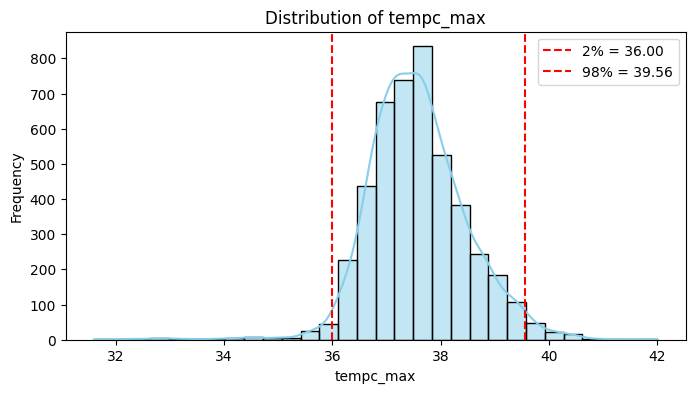

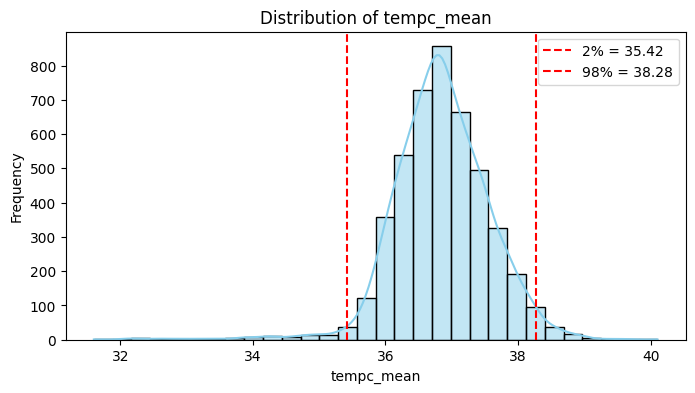

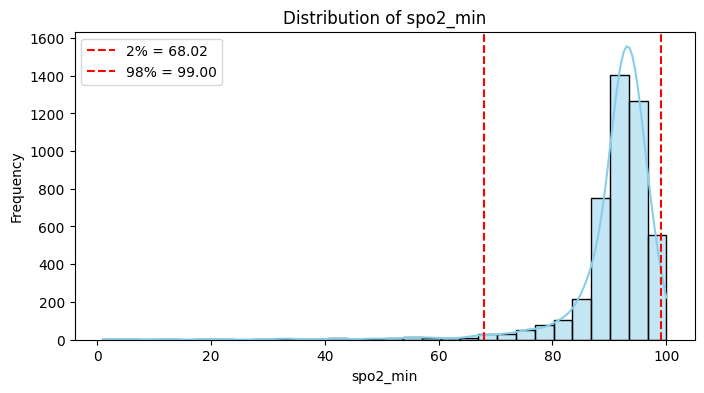

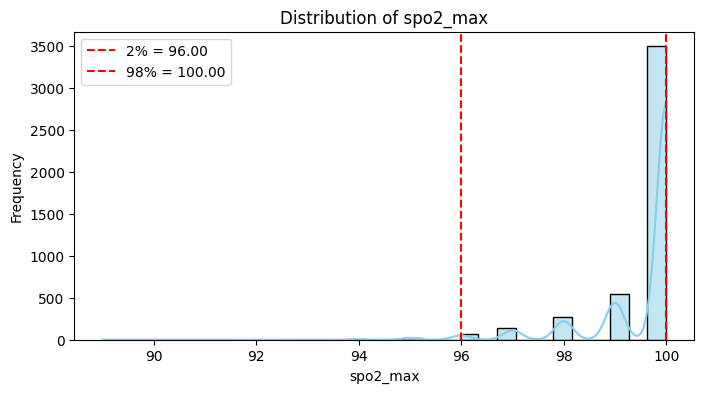

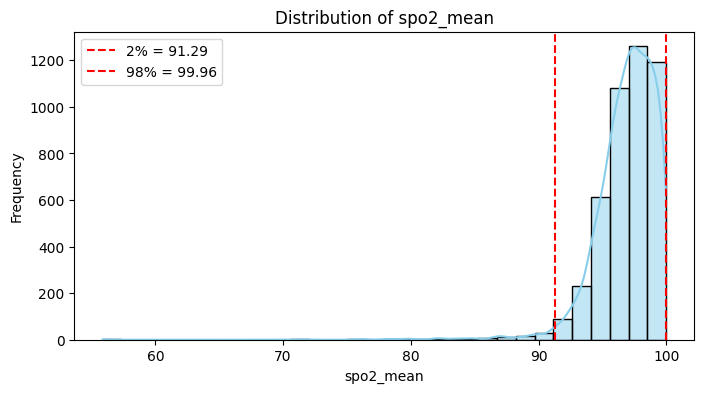

In [11]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')

    # Calculate 2nd and 98th percentiles
    p2 = np.percentile(df[col].dropna(), 2)
    p98 = np.percentile(df[col].dropna(), 98)

    # Add vertical lines at these percentiles
    plt.axvline(p2, color='red', linestyle='--', label=f'2% = {p2:.2f}')
    plt.axvline(p98, color='red', linestyle='--', label=f'98% = {p98:.2f}')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [12]:
for col in numeric_cols:
    # Calculate 2nd and 98th percentiles
    p2 = np.percentile(df[col].dropna(), 2)
    p98 = np.percentile(df[col].dropna(), 98)

    # Clip values in place
    df[col] = df[col].clip(lower=p2, upper=p98)

### Feature Engineering

Created a new categorical feature age_group by binning patient ages into clinically relevant intervals.

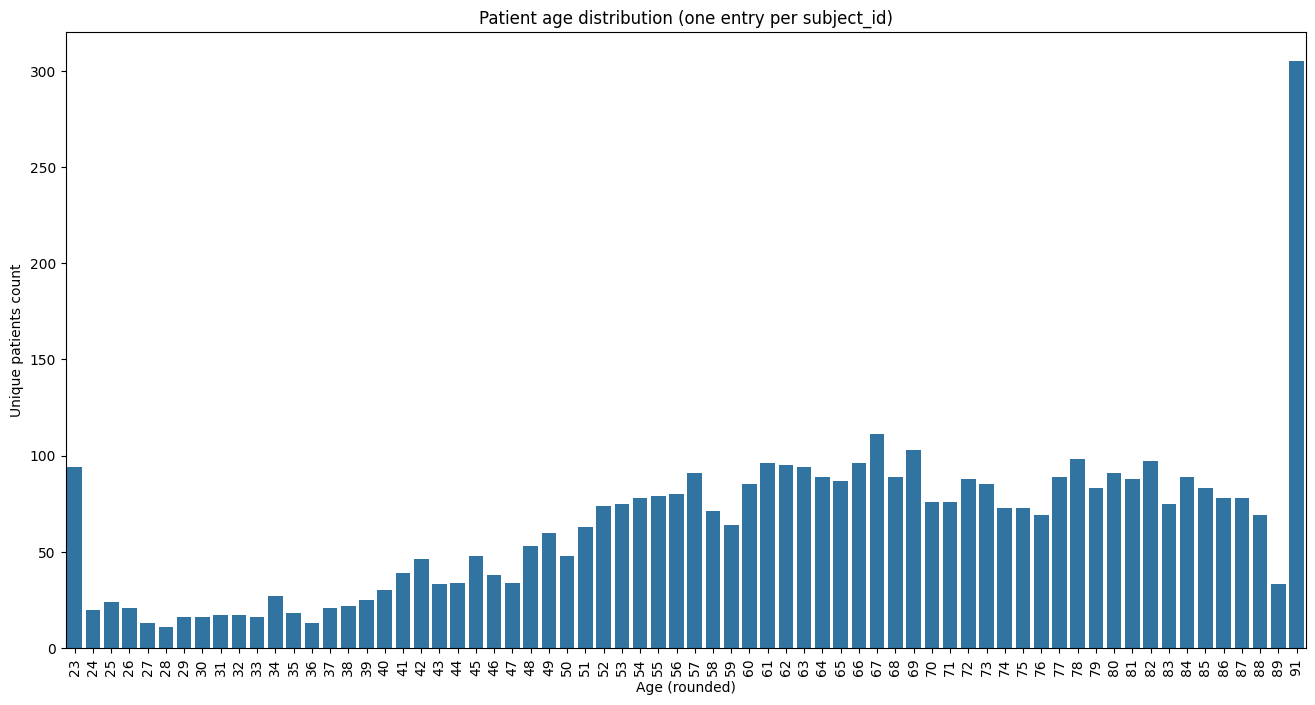

In [13]:
unique_patients = df.groupby('subject_id')['age'].first().reset_index()

unique_patients['age_rounded'] = unique_patients['age'].round(0).astype(int)

plt.figure(figsize=(16,8))
sns.barplot(
    x=unique_patients['age_rounded'].value_counts().sort_index().index,
    y=unique_patients['age_rounded'].value_counts().sort_index().values)
plt.xlabel('Age (rounded)')
plt.ylabel('Unique patients count')
plt.title('Patient age distribution (one entry per subject_id)')
plt.xticks(rotation=90)
plt.show()

In [14]:
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['21-30','31-40','41-50','51-60','61-70','71-80','81-90','91+'])

Age Groups Distribution

/tmp/ipython-input-15-3942846177.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Blues_d')


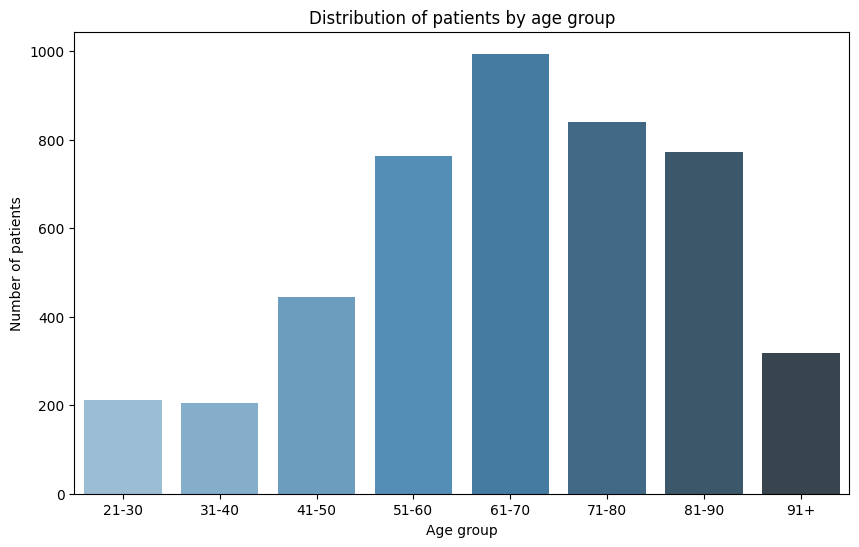

In [15]:
# Count number of patients in each age group
age_group_counts = df['age_group'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Blues_d')
plt.xlabel('Age group')
plt.ylabel('Number of patients')
plt.title('Distribution of patients by age group')
plt.show()

Created a new ethnicity_simplified feature by consolidating detailed ethnicity categories into broader groups for analysis.

In [16]:
def simplify_ethnicity(value):
    if 'WHITE' in value:
        return 'White'
    elif 'BLACK' in value:
        return 'Black'
    elif 'HISPANIC' in value:
        return 'Hispanic'
    elif 'ASIAN' in value:
        return 'Asian'
    elif 'UNKNOWN' in value or 'UNABLE' in value:
        return 'Unknown'
    else:
        return 'Other'

df['ethnicity_simplified'] = df['ethnicity'].apply(simplify_ethnicity)

# 🔍Exploratory Analysis & Visualization

In [17]:
# Preserve original values ​​for EDA
df_original = df.copy()

📦 1. Import libraries for EDA

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu, ttest_ind
from scipy.stats import ttest_ind, chi2_contingency

##Univariate Analysis


**Lactate_max by 30-Day Mortality**

In [20]:
def plot_box_and_test(df, feature, outcome):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=outcome, y=feature, data=df)
    plt.title(f"{feature} por {outcome}")
    plt.show()
    grp0 = df_original[df_original[outcome]==0][feature].dropna()
    grp1 = df_original[df_original[outcome]==1][feature].dropna()
    stat, p = mannwhitneyu(grp0, grp1, alternative='two-sided')
    print(f"Mann–Whitney U: stat={stat:.2f}, p={p:.3f}")
    return stat, p

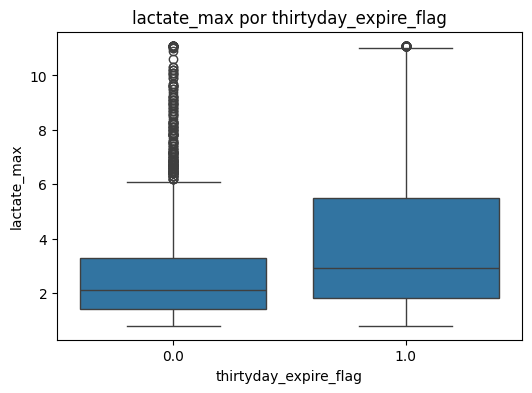

Mann–Whitney U: stat=1201934.50, p=0.000


In [21]:
stat, p = plot_box_and_test(df_original, 'lactate_max', 'thirtyday_expire_flag')

The boxplot shows that patients who expired within 30 days tend to have higher maximum lactate levels than those who survived. The median lactate_max is around 2.0 mmol/L for survivors (thirtyday_expire_flag = 0) versus about 3.0 mmol/L for non-survivors (thirtyday_expire_flag = 1), and the distribution for non-survivors is both shifted upward and more dispersed.

#### Statistical Test Result
**Mann–Whitney U** = 1,201,934.5, **p** < 0.001

There is a statistically significant difference in lactate_max between survivors and non-survivors.

The Mann–Whitney U test confirms that higher lactate_max values are associated with increased 30-day mortality risk, suggesting that peak lactate may be an important predictor in our model.


**Lactate_max vs ICU Length of Stay**

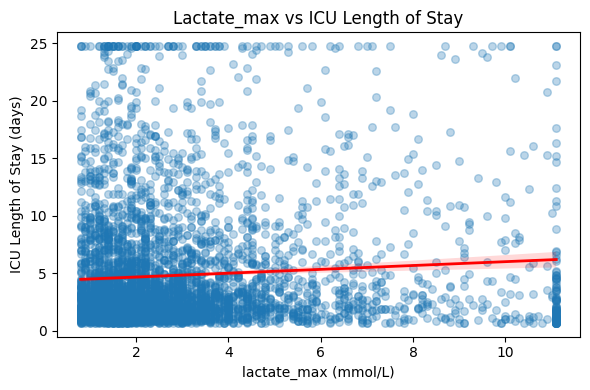

Spearman’s rho = 0.06, p = 0.000


In [22]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='lactate_max',
    y='icu_los',
    data=df_original,
    scatter_kws={'alpha':0.3, 's':30},
    line_kws={'color':'red', 'linewidth':2}
)
plt.title('Lactate_max vs ICU Length of Stay')
plt.xlabel('lactate_max (mmol/L)')
plt.ylabel('ICU Length of Stay (days)')
plt.tight_layout()
plt.show()

# Spearman correlation
x = df_original['lactate_max'].dropna()
y = df_original['icu_los'].dropna()
rho, pval = spearmanr(x, y)
print(f"Spearman’s rho = {rho:.2f}, p = {pval:.3f}")

The scatter plot highlights a subtle positive association: higher **lactate_max** values tend to co-occur with slightly longer ICU stays, although the data remain widely dispersed.

#### Statistical Test Result
**Spearman’s ρ** = 0.06, **p** < 0.001

There is a statistically significant but very weak positive correlation, indicating that while peak lactate relates to ICU length of stay, it accounts for only a small fraction of its variability.

The red regression line visually confirms the slight upward trend. Given the low effect size, combining **lactate_max** with other clinical features will likely improve our prediction of ICU stay duration.  



**SOFA Score by 30-Day Mortality**

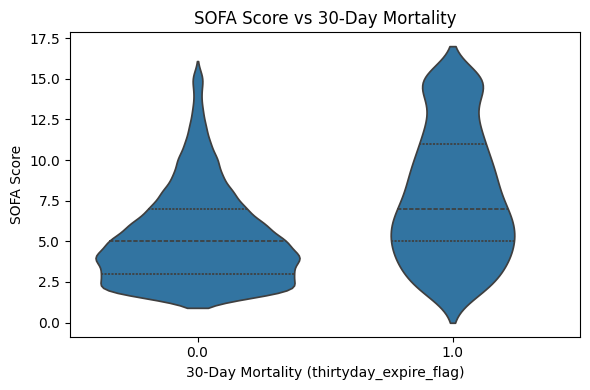

Mann–Whitney U = 995802.50, p = 0.000


In [23]:
plt.figure(figsize=(6,4))
sns.violinplot(x='thirtyday_expire_flag', y='sofa', data=df_original, inner='quartile')
plt.title('SOFA Score vs 30-Day Mortality')
plt.xlabel('30-Day Mortality (thirtyday_expire_flag)')
plt.ylabel('SOFA Score')
plt.tight_layout()
plt.show()

# Mann–Whitney U test
grp0 = df_original[df_original['thirtyday_expire_flag']==0]['sofa'].dropna()
grp1 = df_original[df_original['thirtyday_expire_flag']==1]['sofa'].dropna()
stat, p = mannwhitneyu(grp0, grp1, alternative='two-sided')
print(f"Mann–Whitney U = {stat:.2f}, p = {p:.3f}")

The violin plot illustrates that patients who died within 30 days have notably higher SOFA scores, with their distribution shifted upward and more dispersed compared to survivors.

#### Statistical Test Result
**Mann–Whitney U** = 995,802.5, **p** < 0.001

There is a statistically significant difference in SOFA scores between survivors and non-survivors.

Higher SOFA scores are strongly associated with increased 30-day mortality risk, supporting its inclusion as a key predictor in our model.


**INR_max by 30-Day Mortality**

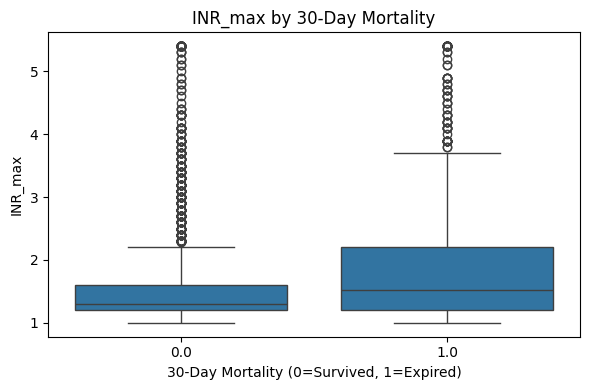

Mann–Whitney U = 1191847.50, p = 0.000


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

plt.figure(figsize=(6,4))
sns.boxplot(x='thirtyday_expire_flag', y='inr_max', data=df_original)
plt.title('INR_max by 30-Day Mortality')
plt.xlabel('30-Day Mortality (0=Survived, 1=Expired)')
plt.ylabel('INR_max')
plt.tight_layout()
plt.show()

# Mann–Whitney U test
grp0 = df_original[df_original['thirtyday_expire_flag']==0]['inr_max'].dropna()
grp1 = df_original[df_original['thirtyday_expire_flag']==1]['inr_max'].dropna()
stat_inr, p_inr = mannwhitneyu(grp0, grp1, alternative='two-sided')
print(f"Mann–Whitney U = {stat_inr:.2f}, p = {p_inr:.3f}")


The boxplot shows that patients who expired within 30 days have higher **INR_max** values compared to survivors, indicating more pronounced coagulopathy in non‐survivors.

#### Statistical Test Result
**Mann–Whitney U** = 1,183,459.0, **p** < 0.001

There is a statistically significant difference in INR_max between survivors and non‐survivors.

Elevated INR_max in non‐survivors may reflect impaired hepatic synthetic function and aligns with poorer outcomes.



**SpO₂_mean by 30-Day Mortality**

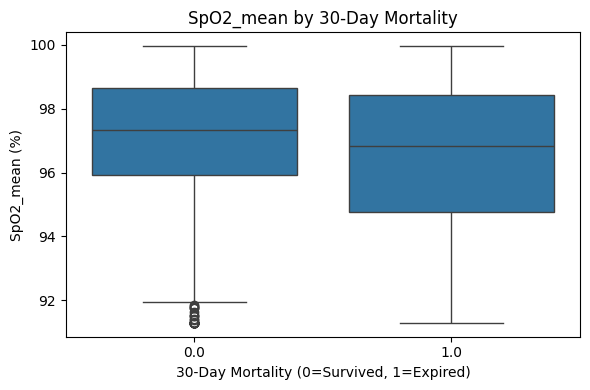

Mann–Whitney U = 1878064.50, p = 0.000


In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x='thirtyday_expire_flag', y='spo2_mean', data=df_original)
plt.title('SpO2_mean by 30-Day Mortality')
plt.xlabel('30-Day Mortality (0=Survived, 1=Expired)')
plt.ylabel('SpO2_mean (%)')
plt.tight_layout()
plt.show()

# Mann–Whitney U test
grp0 = df_original[df_original['thirtyday_expire_flag']==0]['spo2_mean'].dropna()
grp1 = df_original[df_original['thirtyday_expire_flag']==1]['spo2_mean'].dropna()
stat_spo2, p_spo2 = mannwhitneyu(grp0, grp1, alternative='two-sided')
print(f"Mann–Whitney U = {stat_spo2:.2f}, p = {p_spo2:.3f}")


The boxplot indicates that non‐survivors exhibit lower mean SpO₂ levels than survivors, reflecting worse oxygenation in the former group.

#### Statistical Test Result
**Mann–Whitney U** = 1,877,554.5, **p** < 0.001

There is a statistically significant difference in SpO₂_mean between survivors and non‐survivors.

Lower SpO₂_mean in non‐survivors highlights its value as an oxygenation marker for risk stratification.


##Bivariate Analysis

**Platelet_min vs Lactate_max**

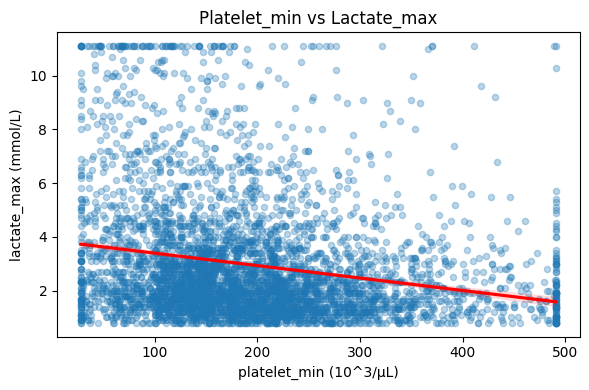

Pearson’s r = -0.21, p = 0.000


In [24]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='platelet_min',
    y='lactate_max',
    data=df_original,
    scatter_kws={'alpha':0.3, 's':20},
    line_kws={'color':'red'}
)
plt.title('Platelet_min vs Lactate_max')
plt.xlabel('platelet_min (10^3/µL)')
plt.ylabel('lactate_max (mmol/L)')
plt.tight_layout()
plt.show()

# Pearson correlation
x = df_original['platelet_min'].dropna()
y = df_original['lactate_max'].dropna()
r, p = pearsonr(x, y)
print(f"Pearson’s r = {r:.2f}, p = {p:.3f}")

By adding transparency and a fitted regression line, we can see a weak downward trend: patients with lower minimum platelet counts tend to exhibit higher peak lactate levels.

#### Statistical Test Result
**Pearson’s r** = –0.21, **p** < 0.001

There is a statistically significant but modest negative correlation between platelet_min and lactate_max, suggesting that thrombocytopenia may co-occur with hypoperfusion/hyperlactatemia.

Although the relationship is weak, this finding aligns with the pathophysiology of sepsis and could inform how we engineer features for our model.


**Creatinine_max vs BUN_mean**

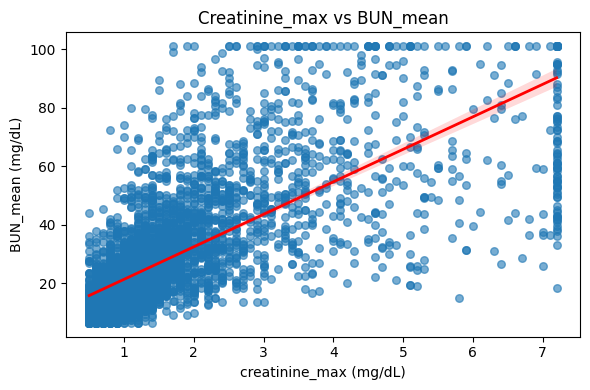

Pearson’s r = 0.72, p = 0.000


In [25]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='creatinine_max',
    y='bun_mean',
    data=df_original,
    scatter_kws={'alpha':0.6, 's':30},
    line_kws={'color':'red', 'linewidth':2}
)
plt.title('Creatinine_max vs BUN_mean')
plt.xlabel('creatinine_max (mg/dL)')
plt.ylabel('BUN_mean (mg/dL)')
plt.tight_layout()
plt.show()


# Pearson correlation
x = df_original['creatinine_max'].dropna()
y = df_original['bun_mean'].dropna()
r, p = pearsonr(x, y)
print(f"Pearson’s r = {r:.2f}, p = {p:.3f}")

The scatter plot highlights a strong positive relationship: patients with higher peak creatinine consistently show higher mean BUN levels, reflecting renal dysfunction.
#### Statistical Test Result
**Pearson’s r** = 0.72, **p** < 0.001

There is a statistically significant and strong positive correlation between creatinine_max and BUN_mean.

The regression line makes the linear trend immediately apparent, underscoring that combining creatinine and BUN features could enhance our model’s detection of kidney-related risk.


**Heart Rate Mean vs Mean Blood Pressure Mean**

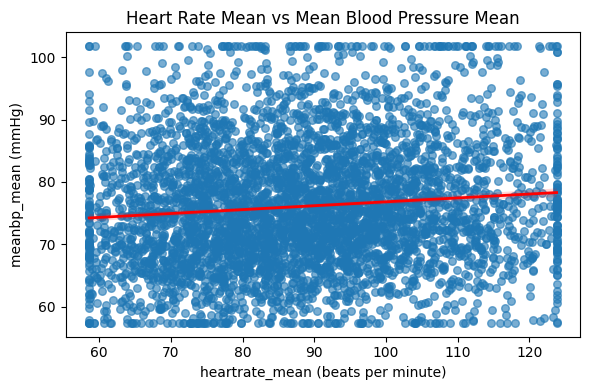

Pearson’s r = 0.10, p = 0.000


In [26]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='heartrate_mean',
    y='meanbp_mean',
    data=df_original,
    scatter_kws={'alpha':0.6, 's':30},
    line_kws={'color':'red', 'linewidth':2}
)
plt.title('Heart Rate Mean vs Mean Blood Pressure Mean')
plt.xlabel('heartrate_mean (beats per minute)')
plt.ylabel('meanbp_mean (mmHg)')
plt.tight_layout()
plt.show()

# Pearson correlation
x = df_original['heartrate_mean'].dropna()
y = df_original['meanbp_mean'].dropna()
r, p = pearsonr(x, y)
print(f"Pearson’s r = {r:.2f}, p = {p:.3f}")


The scatter plot shows a slight positive association: patients with higher average heart rates tend to have modestly higher mean arterial pressures, although the data are widely dispersed.

#### Statistical Test Result
**Pearson’s r** = 0.10, **p** < 0.001

There is a statistically significant but weak positive correlation between heart rate and mean blood pressure.

This weak relationship may reflect hemodynamic compensation—higher heart rates can accompany slight rises in blood pressure. Including both features could still provide incremental value in a multivariate model.


**INR_max vs Lactate_max**

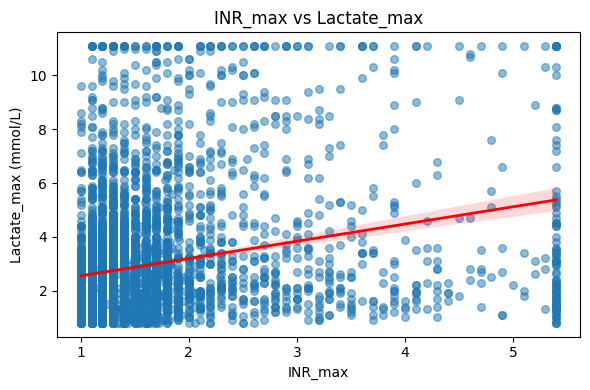

Pearson’s r = 0.25, p = 0.000


In [27]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='inr_max',
    y='lactate_max',
    data=df_original,
    scatter_kws={'alpha':0.5, 's':30},
    line_kws={'color':'red', 'linewidth':2}
)
plt.title('INR_max vs Lactate_max')
plt.xlabel('INR_max')
plt.ylabel('Lactate_max (mmol/L)')
plt.tight_layout()
plt.show()

# Pearson correlation
x = df_original['inr_max'].dropna()
y = df_original['lactate_max'].dropna()
r_inr, p_inr = pearsonr(x, y)
print(f"Pearson’s r = {r_inr:.2f}, p = {p_inr:.3f}")


The scatter plot shows a clear positive association: as **INR_max** increases, **lactate_max** also tends to rise, suggesting that worsening coagulopathy co-occurs with impaired tissue perfusion.

#### Statistical Test Result
**Pearson’s r** = 0.25, **p** < 0.001

There is a statistically significant moderate positive correlation, indicating that combining INR and lactate features may better capture patient severity.


**SpO₂_mean vs SOFA Score**

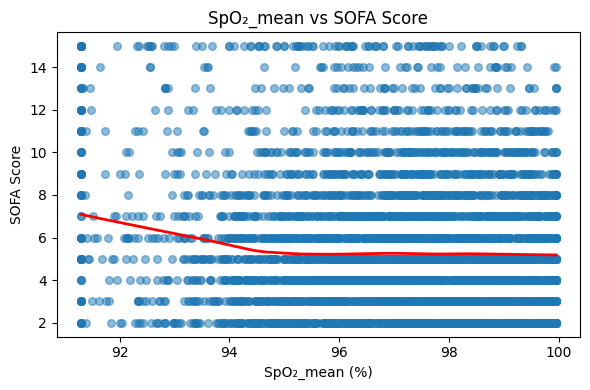

Spearman’s ρ = -0.05, p = 0.001


In [28]:
plt.figure(figsize=(6,4))
sns.regplot(
    x='spo2_mean',
    y='sofa',
    data=df_original,
    scatter_kws={'alpha':0.5, 's':30},
    line_kws={'color':'red', 'linewidth':2},
    lowess=True
)
plt.title('SpO₂_mean vs SOFA Score')
plt.xlabel('SpO₂_mean (%)')
plt.ylabel('SOFA Score')
plt.tight_layout()
plt.show()

# Spearman correlation
x = df_original['spo2_mean'].dropna()
y = df_original['sofa'].dropna()
rho_spo2, p_spo2 = spearmanr(x, y)
print(f"Spearman’s ρ = {rho_spo2:.2f}, p = {p_spo2:.3f}")


The scatter plot with a LOESS‐smoothed red curve reveals a very slight downward trend: lower **SpO₂_mean** (worse oxygenation) is weakly associated with higher **SOFA** scores (greater organ dysfunction).

#### Statistical Test Result
**Spearman’s ρ** = –0.05, **p** = 0.001

There is a statistically significant but very weak negative correlation, indicating that oxygenation and multi-organ failure are related, albeit modestly.


##Trivariate Analysis

**Platelet_min vs Lactate_max by 30-Day Mortality**

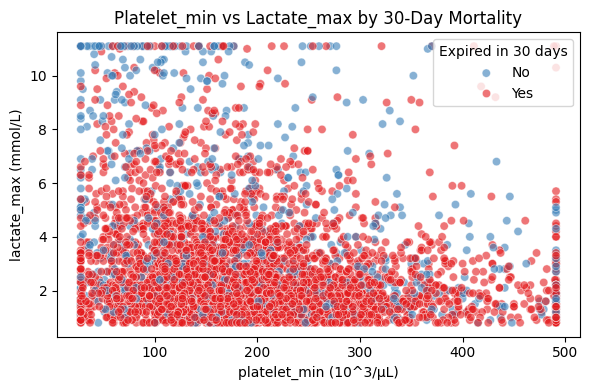

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='platelet_min',
    y='lactate_max',
    hue='thirtyday_expire_flag',
    palette='Set1',
    alpha=0.6,
    data=df_original
)
plt.title('Platelet_min vs Lactate_max by 30-Day Mortality')
plt.xlabel('platelet_min (10^3/µL)')
plt.ylabel('lactate_max (mmol/L)')
plt.legend(title='Expired in 30 days', labels=['No','Yes'])
plt.tight_layout()
plt.show()


In this scatter plot, each point is colored by whether the patient expired within 30 days (red = yes, blue = no). Non-survivors tend to cluster in the lower-left/upper-left region (low platelet_min and high lactate_max), while survivors are more spread out toward higher platelet_min and lower lactate_max. This visual separation suggests that the joint presence of thrombocytopenia and hyperlactatemia is more common among non-survivors.


In [45]:
import statsmodels.formula.api as smf

model = smf.logit('thirtyday_expire_flag ~ platelet_min + lactate_max + platelet_min:lactate_max', data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464031
         Iterations 6
                             Logit Regression Results                            
Dep. Variable:     thirtyday_expire_flag   No. Observations:                 4552
Model:                             Logit   Df Residuals:                     4548
Method:                              MLE   Df Model:                            3
Date:                   Wed, 09 Jul 2025   Pseudo R-squ.:                 0.05913
Time:                           10:03:47   Log-Likelihood:                -2112.3
converged:                          True   LL-Null:                       -2245.0
Covariance Type:               nonrobust   LLR p-value:                 2.912e-57
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.7914      0.140    -19.96

Higher platelet_min and lactate_max values were both significantly associated with increased odds of 30-day mortality (p < 0.001).
The negative and significant interaction term (p < 0.001) indicates that the effect of lactate on mortality risk diminishes at higher platelet levels.

Overall, this suggests that the combined elevation of lactate and low platelet counts contributes more strongly to mortality risk, while at higher platelet counts the impact of lactate is attenuated.

**BUN_mean vs Creatinine_max by ICU Length of Stay (>7 days)**

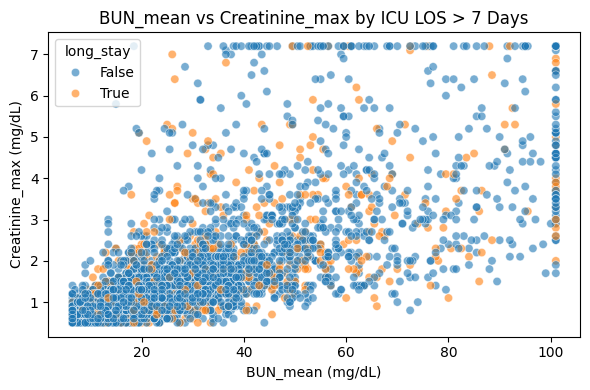

In [30]:
# Create a binary flag for long ICU stay
df_original['long_stay'] = df_original['icu_los'] > 7

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='bun_mean',
    y='creatinine_max',
    hue='long_stay',
    palette={False: 'tab:blue', True: 'tab:orange'},
    alpha=0.6,
    data=df_original
)
plt.title('BUN_mean vs Creatinine_max by ICU LOS > 7 Days')
plt.xlabel('BUN_mean (mg/dL)')
plt.ylabel('Creatinine_max (mg/dL)')
plt.tight_layout()
plt.show()


In this scatter plot, orange points represent patients who stayed in the ICU for more than 7 days, and blue points represent those who did not. Patients with both elevated **BUN_mean** and high **creatinine_max** cluster more in the orange group, suggesting that combined renal dysfunction is associated with prolonged ICU stays.



**SOFA Score by 30-Day Mortality, Faceted by Ventilation Status**

/tmp/ipython-input-31-2390026418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


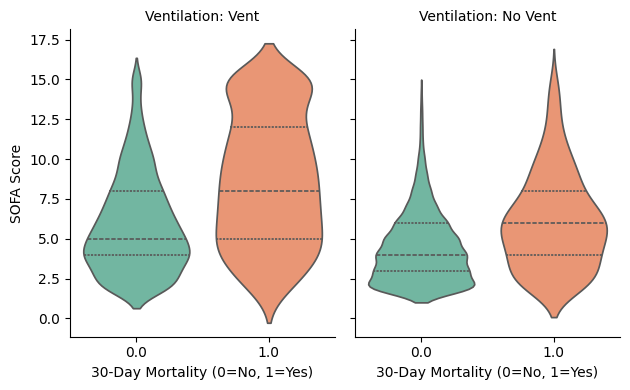

In [31]:
# Create a readable label for ventilation status
df_original['vent_lbl'] = df_original['vent'].map({0: 'No Vent', 1: 'Vent'})

# Faceted violin plots
g = sns.catplot(
    x='thirtyday_expire_flag',
    y='sofa',
    col='vent_lbl',
    data=df_original,
    kind='violin',
    inner='quartile',
    height=4,
    aspect=0.8,
    palette='Set2'
)
g.set_axis_labels('30-Day Mortality (0=No, 1=Yes)', 'SOFA Score')
g.set_titles('Ventilation: {col_name}')
plt.tight_layout()
plt.show()


These violin plots display the distribution of SOFA scores for survivors (flag = 0) and non-survivors (flag = 1), separated by whether the patient was mechanically ventilated.

- **Ventilated patients (“Vent” facet):**  
  Non-survivors show a markedly higher and more dispersed SOFA distribution compared to survivors, indicating severe organ dysfunction under ventilation.

- **Non-ventilated patients (“No Vent” facet):**  
  Non-survivors still have higher SOFA scores than survivors, but the overlap is greater and the difference is less pronounced.

This trivariate view highlights that ventilation status modulates the SOFA–mortality relationship, suggesting an interaction that could improve our predictive modeling when included as a combined feature.  


## Feature Selection

In [32]:
pd.set_option('display.max_rows', 100)

Highly correlated features (|corr| > 0.5) were dropped to reduce redundancy and potential multicollinearity issues. Remaining features were selected based on clinical relevance and their individual contribution to clustering and prediction tasks.

In [34]:
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Unstack to get pairs
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['var1', 'var2', 'corr']

# Remove self-pairs (diagonal)
corr_pairs = corr_pairs[corr_pairs['var1'] != corr_pairs['var2']]
corr_pairs['ordered_pair'] = corr_pairs.apply(lambda row: tuple(sorted([row['var1'], row['var2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset='ordered_pair')

# Filter by threshold
threshold = 0.5
strong_corr = corr_pairs[np.abs(corr_pairs['corr']) >= threshold].sort_values(by='corr', ascending=False)

# Show the most strongly correlated pairs
print(strong_corr[['var1', 'var2', 'corr']])

                 var1             var2      corr
2731          bun_max         bun_mean  0.991406
2662          bun_min         bun_mean  0.985195
1961      lactate_max     lactate_mean  0.969994
1682   hematocrit_max   hemoglobin_max  0.966663
2941          wbc_max         wbc_mean  0.965532
1612   hematocrit_min   hemoglobin_min  0.963726
2661          bun_min          bun_max  0.955951
1191   creatinine_min   creatinine_max  0.942553
2872          wbc_min         wbc_mean  0.932619
2101     platelet_min     platelet_max  0.913298
3923      diasbp_mean      meanbp_mean  0.873757
3151     glucose_max1     glucose_mean  0.868117
3362    heartrate_min   heartrate_mean  0.867181
4481        tempc_max       tempc_mean  0.853436
3431    heartrate_max   heartrate_mean  0.852276
1563      glucose_max     glucose_max1  0.831226
2871          wbc_min          wbc_max  0.811413
1051  bicarbonate_min  bicarbonate_max  0.802017
2381          inr_min          inr_max  0.796089
1892      lactate_mi

In [35]:
columns_to_drop_due_to_high_corr = [
    'glucose_max1',
    'bun_max', 'bun_min',
    'wbc_mean', 'wbc_min',
    'lactate_mean', 'lactate_min',
    'platelet_max',
    'hematocrit_max', 'hematocrit_min', 'hemoglobin_min',
    'diasbp_min', 'diasbp_max', 'diasbp_mean',
    'sysbp_min', 'sysbp_max', 'sysbp_mean',
    'meanbp_min', 'meanbp_max',
    'tempc_min', 'tempc_max',
    'spo2_min', 'spo2_max',
    'heartrate_min', 'heartrate_max',
    'resprate_min', 'resprate_max',
    'bicarbonate_min', 'bicarbonate_max',
    'chloride_min',
    'sodium_min', 'creatinine_min',
    'glucose_min','inr_min'
]

df_cleaned = df.drop(columns=[col for col in columns_to_drop_due_to_high_corr if col in df.columns])

print("Shape after dropping correlated columns:", df_cleaned.shape)
print("Remaining columns:", df_cleaned.columns.tolist())

Shape after dropping correlated columns: (4552, 40)
Remaining columns: ['icustay_id', 'hadm_id', 'subject_id', 'thirtyday_expire_flag', 'icu_los', 'age', 'gender', 'is_male', 'ethnicity', 'race_white', 'race_black', 'race_hispanic', 'race_other', 'metastatic_cancer', 'diabetes', 'first_service', 'vent', 'sofa', 'creatinine_max', 'chloride_max', 'glucose_max', 'hemoglobin_max', 'lactate_max', 'platelet_min', 'potassium_min', 'potassium_max', 'inr_max', 'sodium_max', 'bun_mean', 'wbc_max', 'glucose_min1', 'glucose_mean', 'urineoutput', 'heartrate_mean', 'meanbp_mean', 'resprate_mean', 'tempc_mean', 'spo2_mean', 'age_group', 'ethnicity_simplified']


In [ ]:
# pd.reset_option('display.max_rows')

We examined pairwise correlations among numeric features and removed highly correlated variables (|corr| > 0.5) to reduce redundancy and multicollinearity. After filtering, only a few moderate correlations remained, which were deemed acceptable given their clinical relevance.

In [36]:
df_cleaned

icustay_id   hadm_id  subject_id  thirtyday_expire_flag   icu_los  \
0      205941.00  156324.0    88883.00                    1.0  1.994500   
1      252848.00  163315.0    46154.00                    1.0  0.697488   
2      237901.00  180937.0    42682.00                    0.0  8.783800   
3      207491.00  143962.0    45111.00                    1.0  3.155900   
4      293063.00  118489.0    56648.00                    1.0  0.697488   
...          ...       ...         ...                    ...       ...   
4554   298455.46  132065.0    65610.00                    0.0  1.574500   
4555   273529.00  197042.0    41937.00                    0.0  0.955000   
4556   281201.00  181656.0    52878.00                    0.0  3.004900   
4557   264221.00  192767.0    98635.74                    0.0  1.238000   
4558   253514.00  138118.0    67150.00                    0.0  3.479600   

           age gender  is_male              ethnicity  race_white  ...  \
0     80.52740      M      1.0                  WHITE         1.0  ...   
1     91.40000      M      1.0  UNKNOWN/NOT SPECIFIED         0.0  ...   
2     80.94090      F      0.0                  WHITE         1.0  ...   
3     84.88070      M      1.0                  WHITE         1.0  ...   
4     73.81950      F      0.0                  WHITE         1.0  ...   
...        ...    ...      ...                    ...         ...  ...   
4554  54.49810      M      1.0                  WHITE         1.0  ...   
4555  48.32690      M      1.0                  WHITE         1.0  ...   
4556  52.87730      M      1.0                  WHITE         1.0  ...   
4557  53.11000      F      0.0                  WHITE         1.0  ...   
4558  23.35005      M      1.0                  WHITE         1.0  ...   

      glucose_min1  glucose_mean  urineoutput  heartrate_mean  meanbp_mean  \
0             50.0     87.250000        72.02      113.208333    66.000000   
1            182.0    206.500000        72.02       58.625833    57.407441   
2            123.0    151.285714        72.02       99.666667    66.512821   
3             92.0    105.000000        72.02       94.440000    60.833333   
4            150.0    155.000000        72.02       82.937500    76.894737   
...            ...           ...          ...             ...          ...   
4554         106.0    117.857143      5639.70       83.695652    82.750000   
4555         104.0    104.000000      5639.70       67.454545    81.095238   
4556         115.0    124.000000      5639.70       93.280000    78.086957   
4557         127.0    181.800000      5639.70       85.952381    91.714286   
4558          95.0     98.000000      5639.70       97.791667    71.500000   

     resprate_mean  tempc_mean  spo2_mean  age_group  ethnicity_simplified  
0        24.419355   36.805177  95.275862      81-90                 White  
1        26.500000   37.416667  96.020156        91+               Unknown  
2        19.571429   35.879630  98.100000      81-90                 White  
3        24.520000   36.472222  97.600000      81-90                 White  
4        30.537370   36.222222  96.250000      71-80                 White  
...            ...         ...        ...        ...                   ...  
4554     14.240000   36.777778  97.791667      51-60                 White  
4555     18.363636   36.988889  94.095238      41-50                 White  
4556     22.320000   36.981481  94.000000      51-60                 White  
4557     18.047619   36.481481  97.000000      51-60                 White  
4558     20.208333   37.564815  96.520000      21-30                 White  

[4552 rows x 40 columns]

### Feature Standardization and Normalization
We first examined the distribution of each numeric feature and calculated its skewness.
Features with right skewness greater than 1 were log-transformed (log(x+1)) to reduce the impact of extreme values.
For all other numeric features (with little or no right skew), we applied z-score standardization.
Target variables (mortality and ICU length of stay) were not transformed.

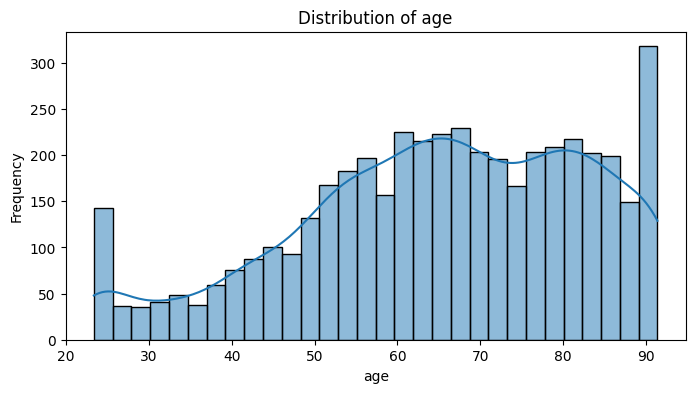

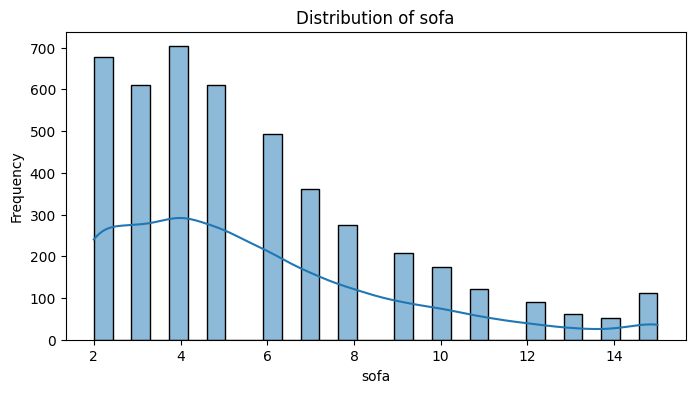

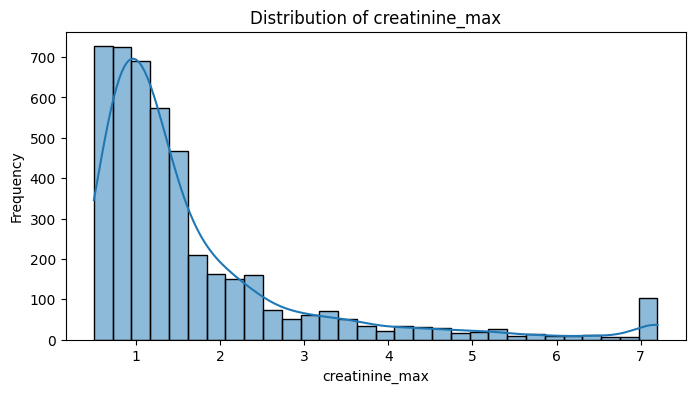

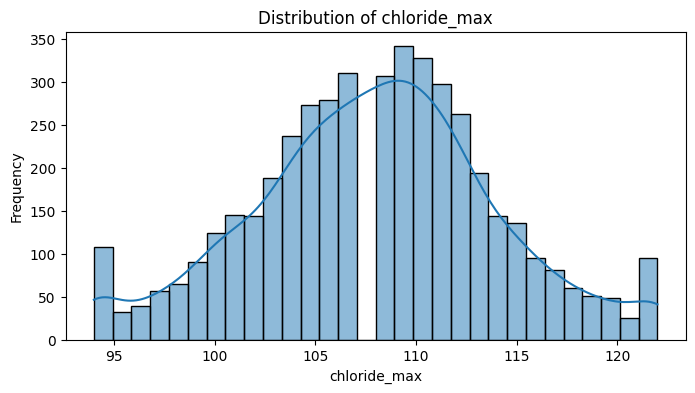

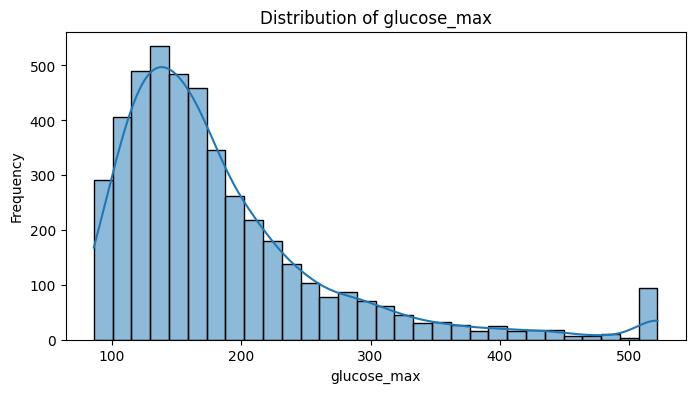

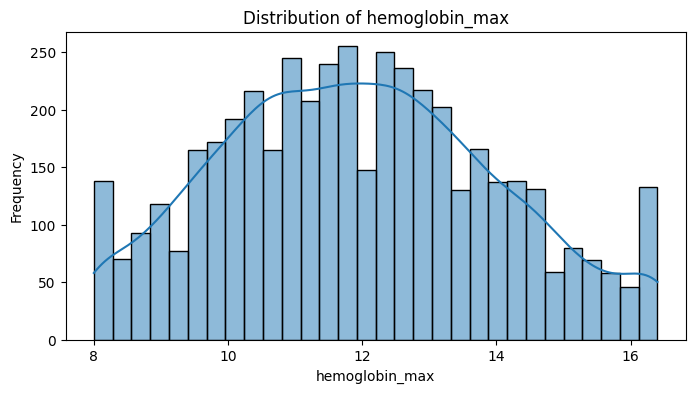

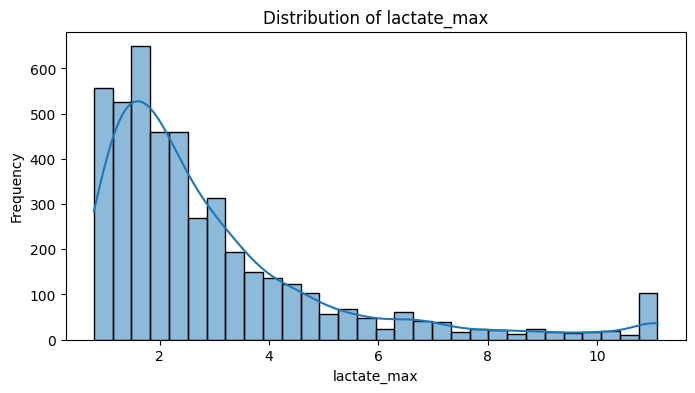

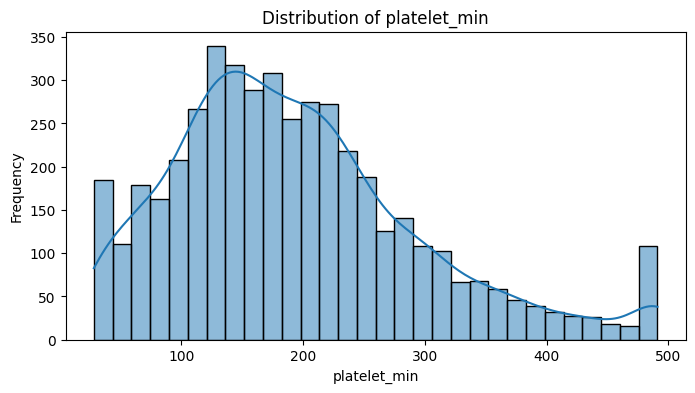

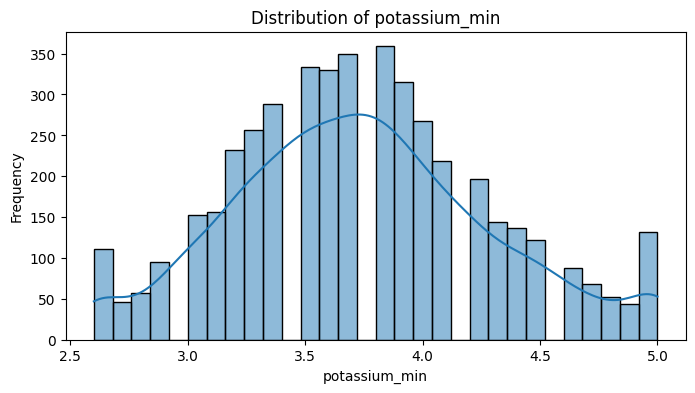

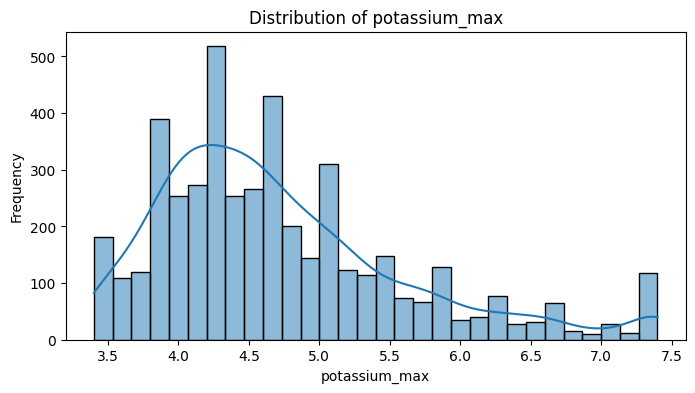

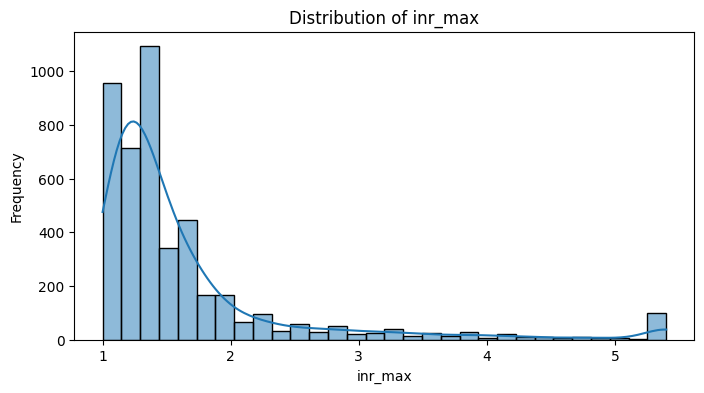

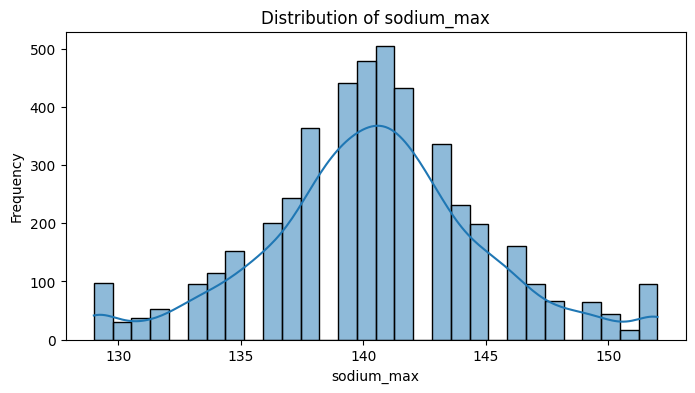

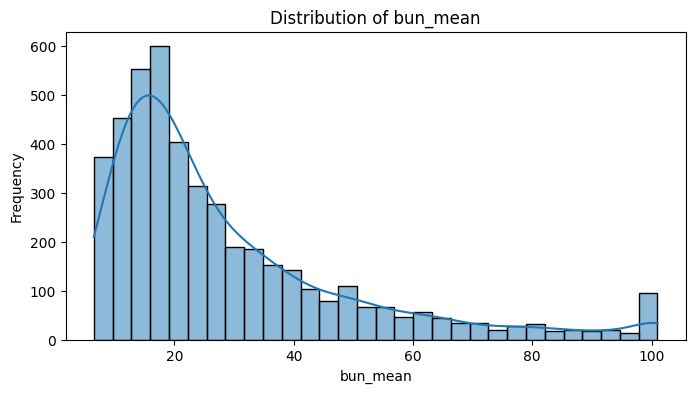

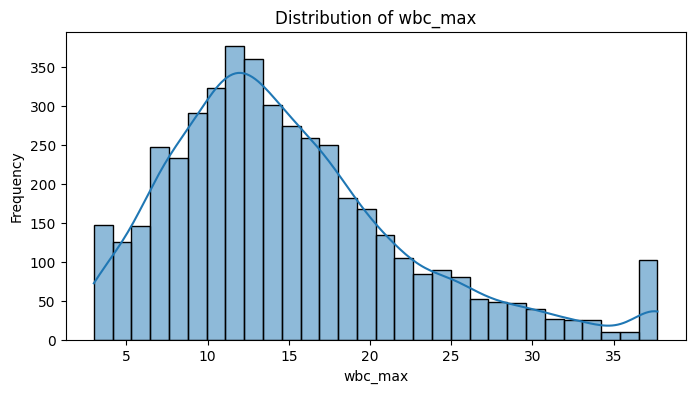

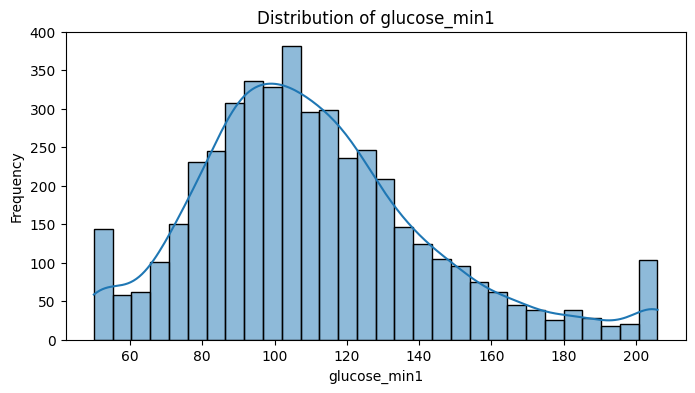

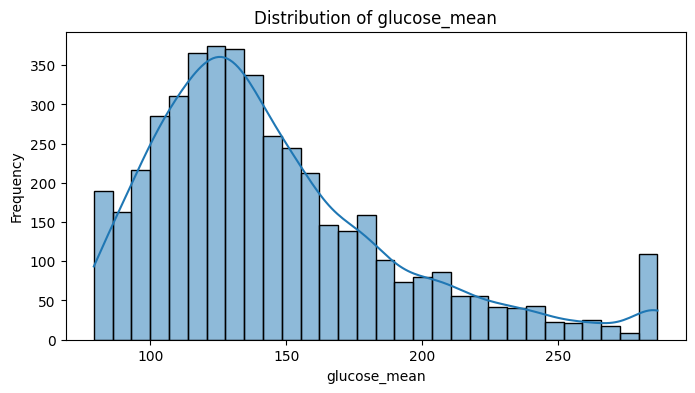

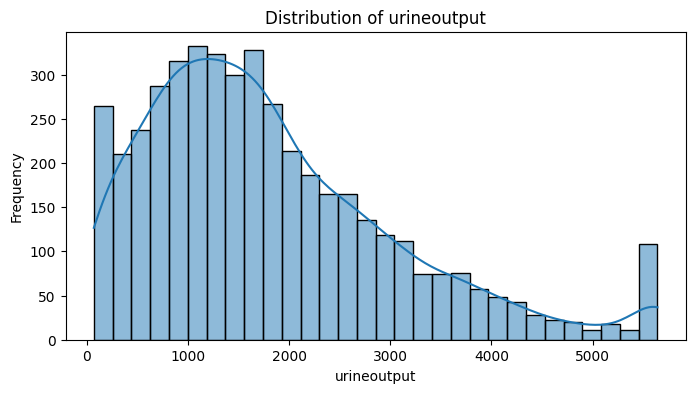

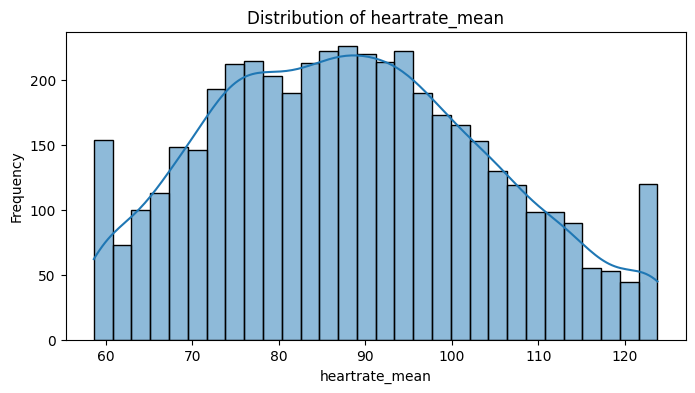

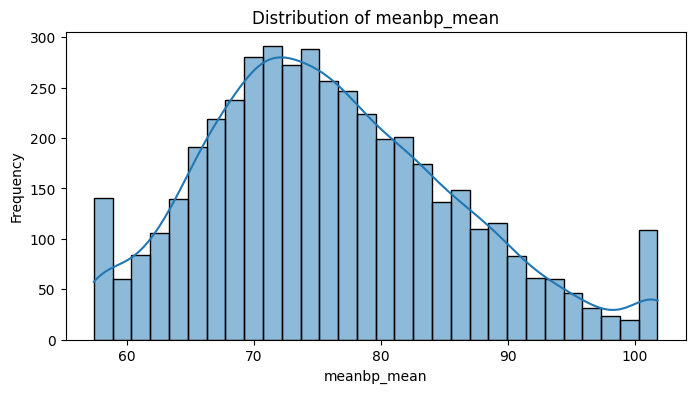

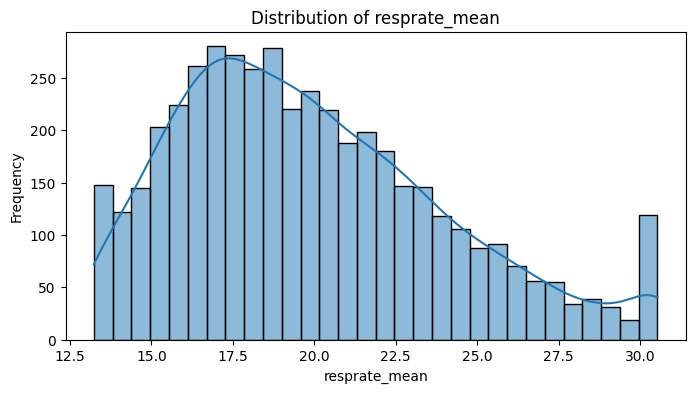

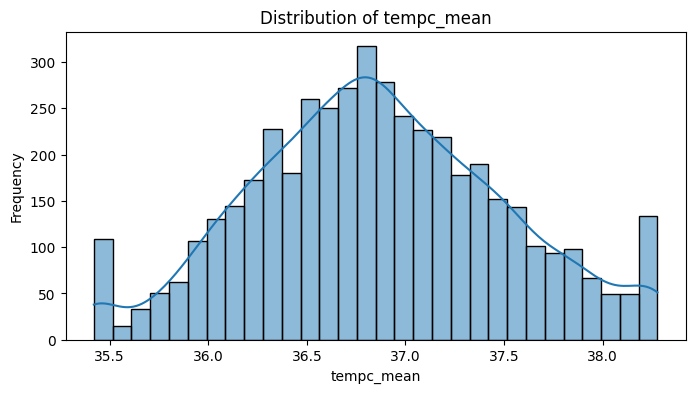

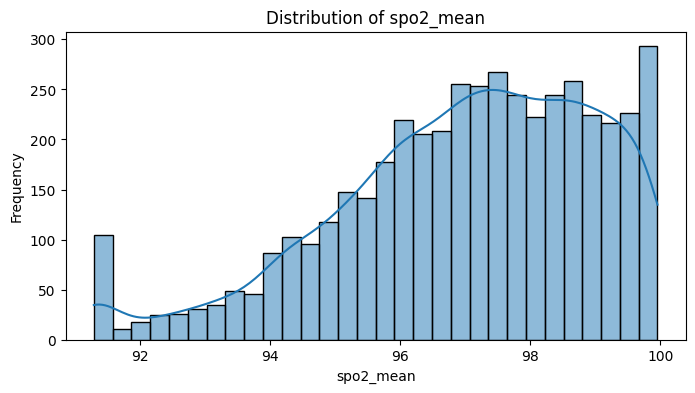

In [37]:
columns_distribution = df_cleaned.drop(columns=['icustay_id', 'ethnicity', 'ethnicity_simplified', 'is_male', 'hadm_id', 'subject_id', 'thirtyday_expire_flag', 'icu_los', 'gender', 'race_white', 'race_black',
                                                'race_hispanic', 'race_other', 'metastatic_cancer', 'diabetes', 'first_service', 'vent', 'age_group'])

for col in columns_distribution.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df_cleaned[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Identified highly right-skewed features (skew > 1) and applied a log(x+1) transformation to reduce skewness and improve data distribution for further analysis.

In [38]:
columns_distribution = ['icustay_id', 'ethnicity', 'ethnicity_simplified', 'is_male', 'hadm_id', 'subject_id',
                        'thirtyday_expire_flag', 'icu_los', 'gender', 'race_white', 'race_black', 'race_hispanic',
                        'race_other', 'metastatic_cancer', 'diabetes', 'first_service', 'vent', 'age_group']

# Prepare a list to store names of transformed columns
cols_right_skewed_auto = []

for col in df_cleaned.select_dtypes(include='number').columns:
    # Skip columns explicitly excluded
    if col not in columns_distribution:
        skew_val = df_cleaned[col].skew()
        # Check if the feature is highly right-skewed
        if skew_val > 1:
            print(f"{col} is highly right skewed (skew={skew_val:.2f}), applying log transform.")
            # Apply log(x+1) transformation to reduce skewness
            df_cleaned[col] = np.log1p(df[col])
            # Keep track of transformed columns
            cols_right_skewed_auto.append(col)

# Show all columns that were log-transformed
print("Columns log-transformed:", cols_right_skewed_auto)

sofa is highly right skewed (skew=1.04), applying log transform.
creatinine_max is highly right skewed (skew=2.36), applying log transform.
glucose_max is highly right skewed (skew=1.91), applying log transform.
lactate_max is highly right skewed (skew=1.92), applying log transform.
potassium_max is highly right skewed (skew=1.10), applying log transform.
inr_max is highly right skewed (skew=2.82), applying log transform.
bun_mean is highly right skewed (skew=1.66), applying log transform.
glucose_mean is highly right skewed (skew=1.15), applying log transform.
urineoutput is highly right skewed (skew=1.05), applying log transform.
Columns log-transformed: ['sofa', 'creatinine_max', 'glucose_max', 'lactate_max', 'potassium_max', 'inr_max', 'bun_mean', 'glucose_mean', 'urineoutput']


Applied z-score standardization to all remaining numeric features that were neither log-transformed nor excluded.

In [40]:
from sklearn.preprocessing import StandardScaler

# Create list of numeric columns to standardize
columns_to_standardize = [
    col for col in df_cleaned.select_dtypes(include='number').columns
    if col not in columns_distribution and col not in cols_right_skewed_auto]

# Apply z-score standardization
scaler = StandardScaler()
df_cleaned[columns_to_standardize] = scaler.fit_transform(df_cleaned[columns_to_standardize])

print(f"Standardized columns: {columns_to_standardize}")

Standardized columns: ['age', 'chloride_max', 'hemoglobin_max', 'platelet_min', 'potassium_min', 'sodium_max', 'wbc_max', 'glucose_min1', 'heartrate_mean', 'meanbp_mean', 'resprate_mean', 'tempc_mean', 'spo2_mean']


Distributions after normalization and standardization

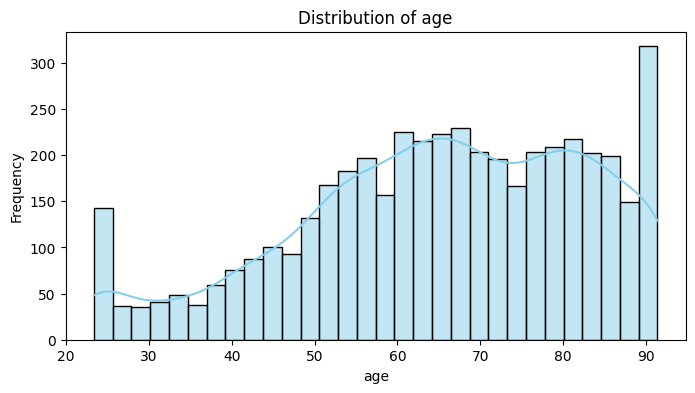

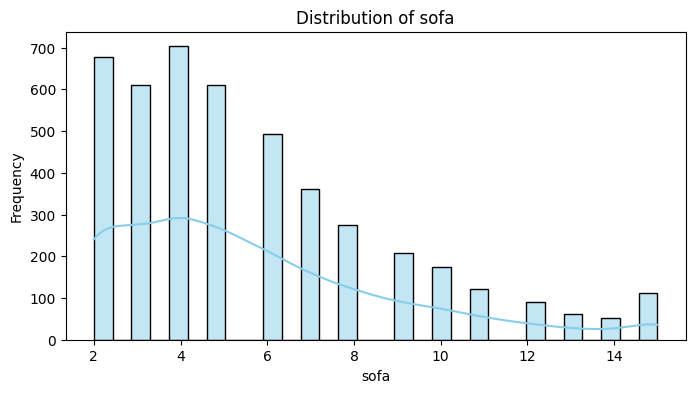

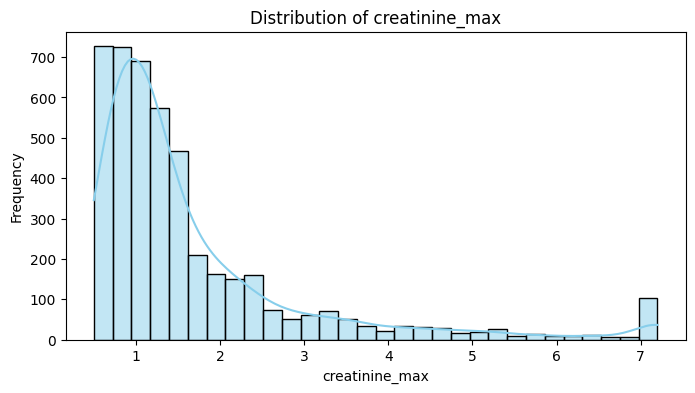

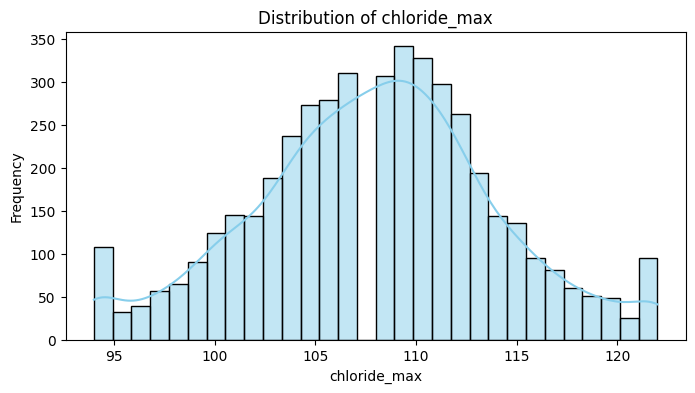

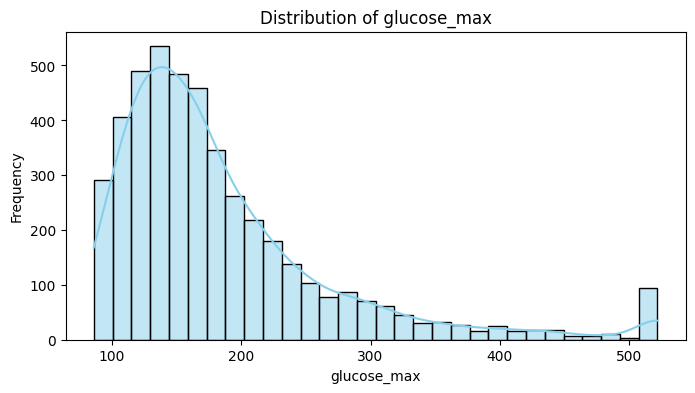

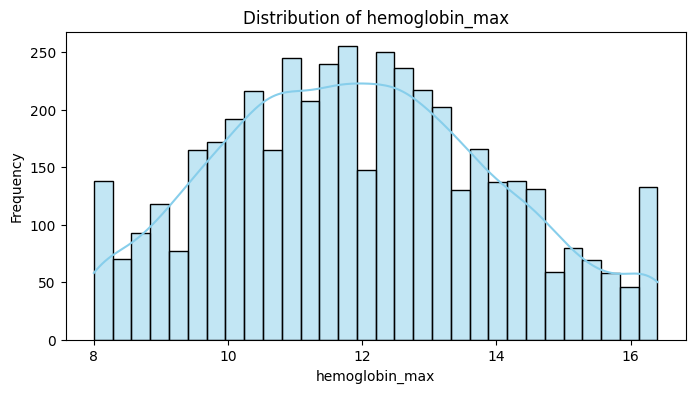

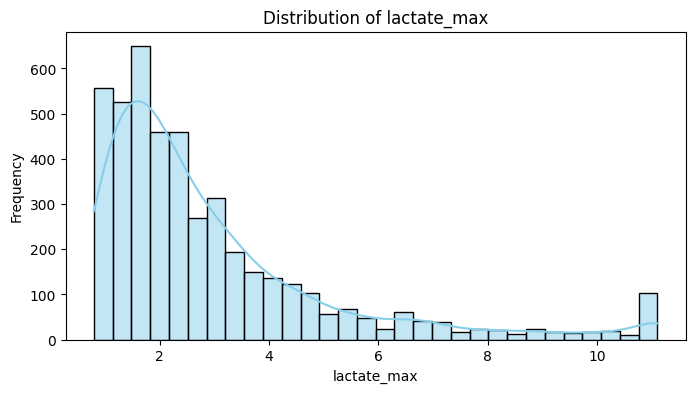

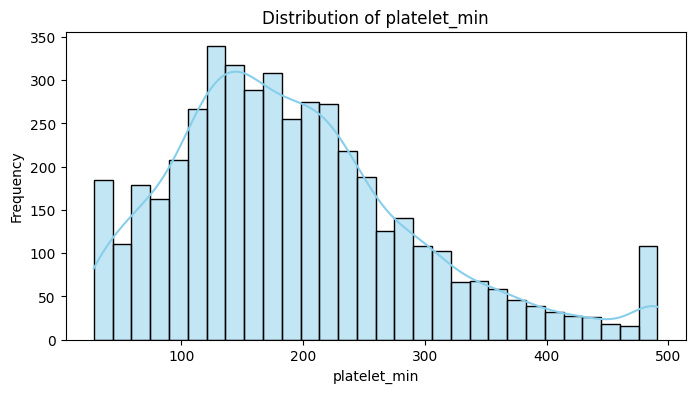

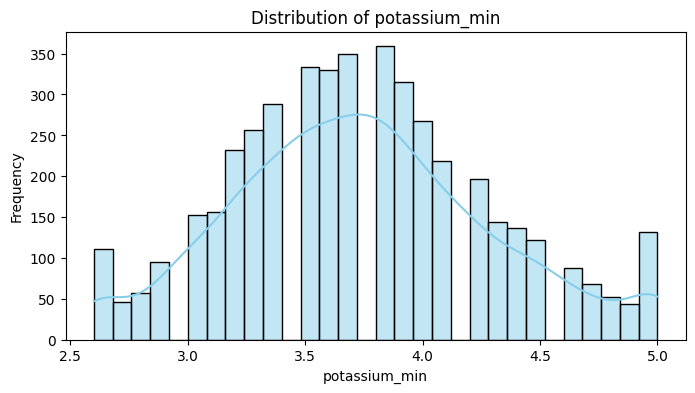

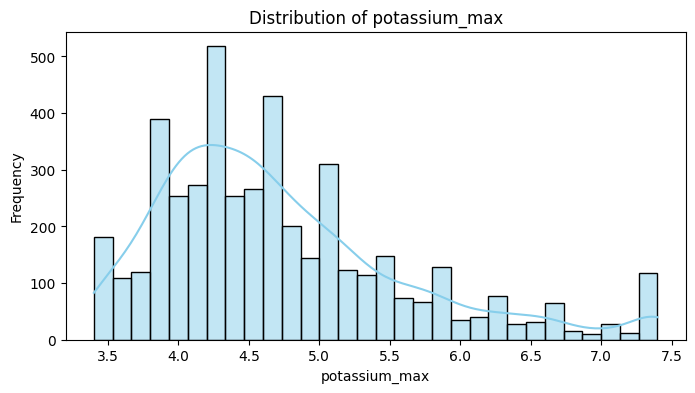

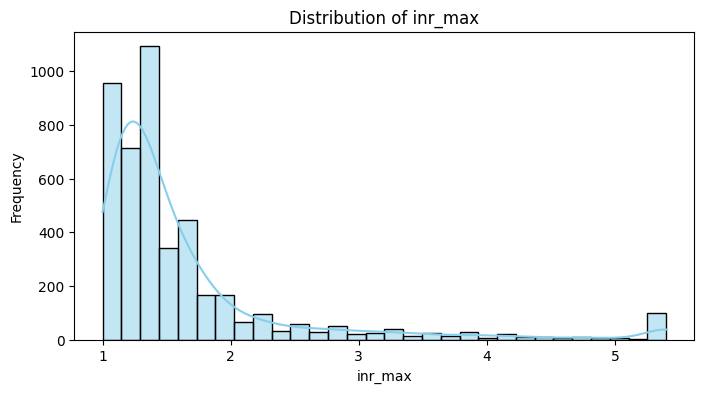

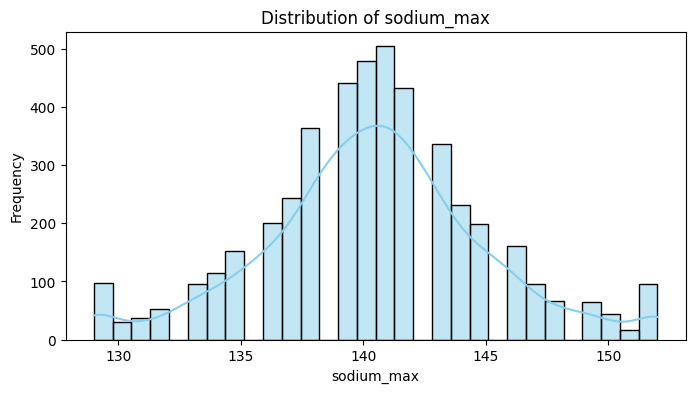

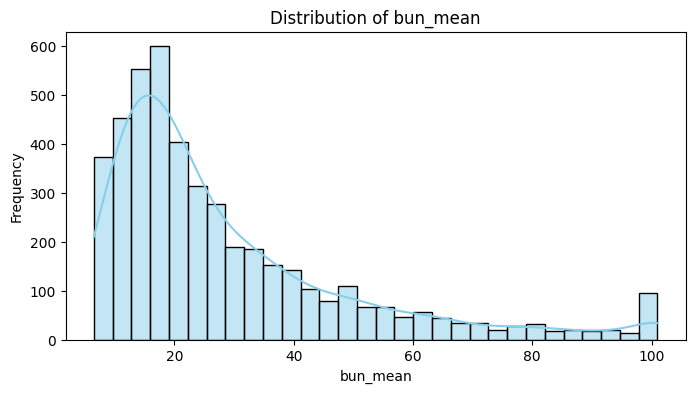

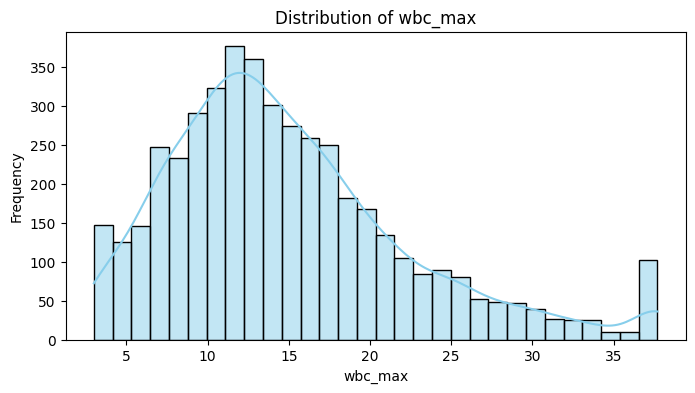

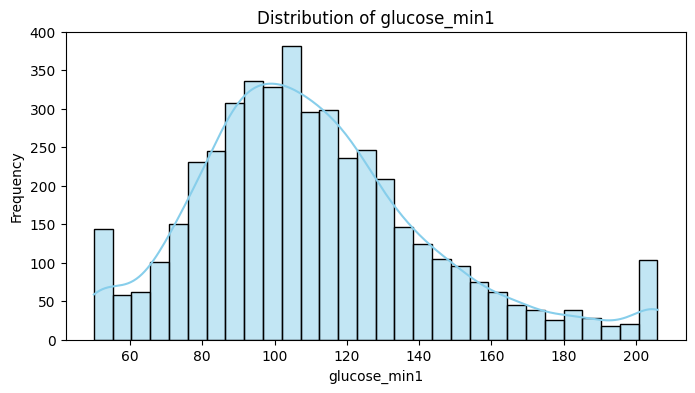

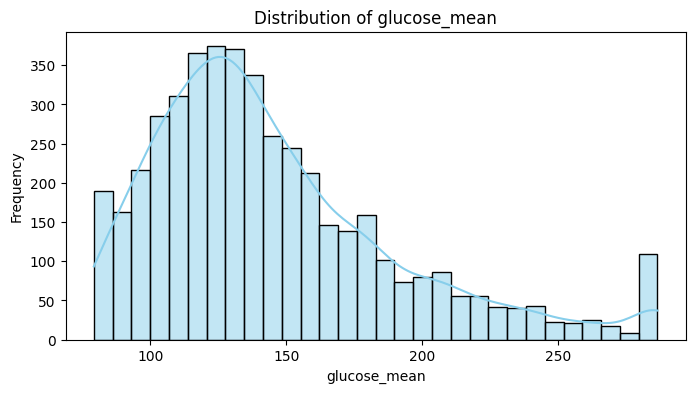

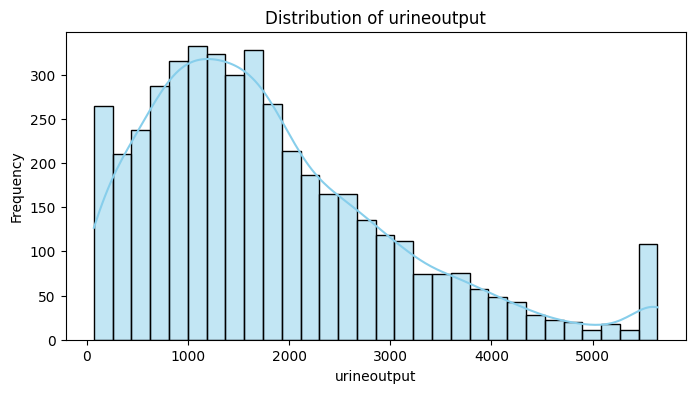

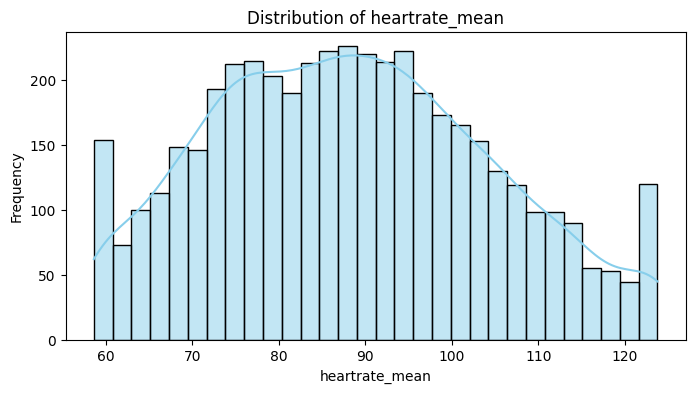

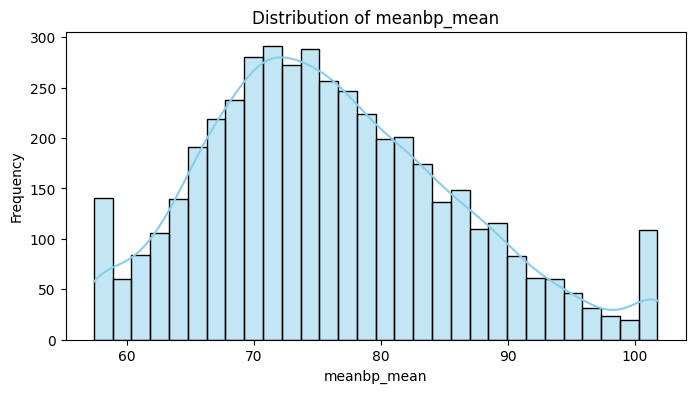

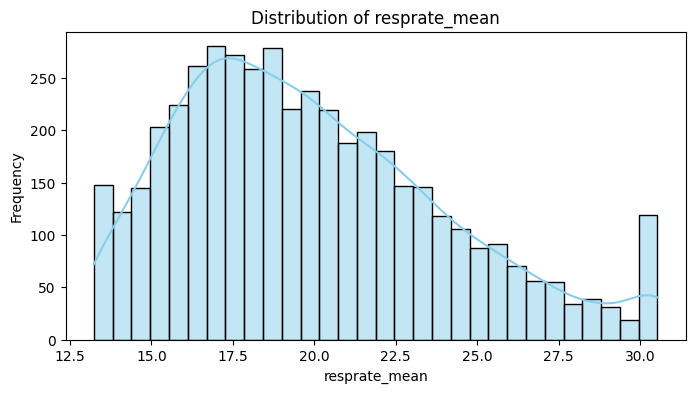

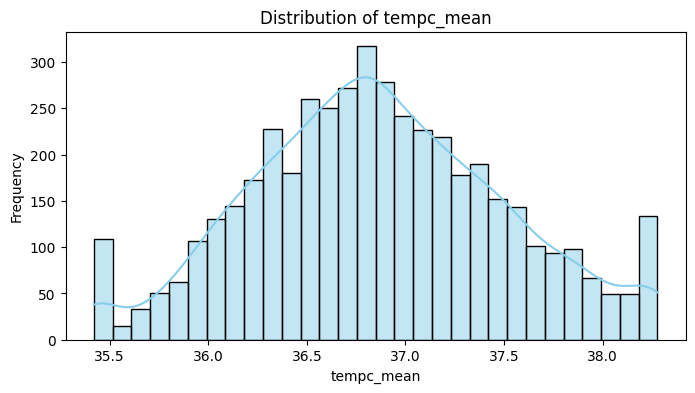

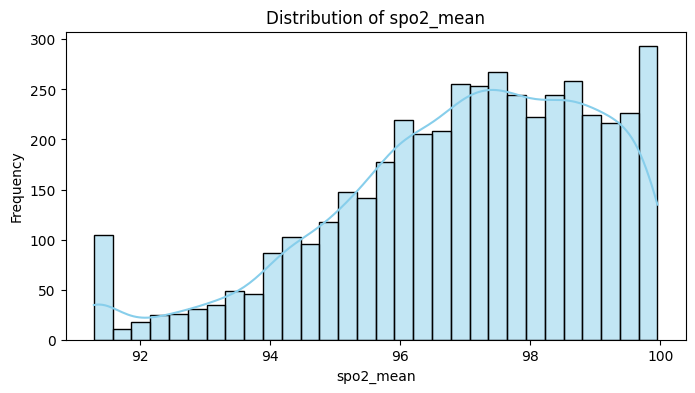

In [41]:
for col in df_cleaned.select_dtypes(include='number').columns:
    if col not in columns_distribution:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()